## Proyecto Integrador

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

### Avance 1

In [2]:
data = pd.read_csv("data_latinoamerica.csv",sep=",")

In [3]:
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
np.shape(data)

(12216057, 50)

Siguiendo con lo solicitado por el área de ingeniería de datos y el objetivo del proyecto nos podemos enfocar en los 6 países que se han  propuesto por el análisis.

In [5]:
#Conteo de los registros por país

data.country_name.value_counts()

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Venezuela               24775
Ecuador                 24775
Guatemala               22793
Uruguay                 19820
Honduras                18829
Paraguay                18829
Nicaragua               17838
Cuba                    17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

In [6]:
#En una variable se filtra la data seleccionando unicamente los países indicados

paises_seleccionados = ["Argentina","Chile","Brazil","Mexico","Peru","Colombia"]
data_latinoamerica = data[data["country_name"].isin(paises_seleccionados)]

Cantidad de datos obtenidos con este filtrado por países:

In [7]:
np.shape(data_latinoamerica)

(11970289, 50)

Verificación de datos faltantes por columna

In [8]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [9]:
data_latinoamerica.location_key.value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_140       991
AR_A_147       991
AR_A_154       991
AR_A_161       991
AR_B           991
Name: count, Length: 12079, dtype: int64

Luego de hacer un analisis de la calidad de los datos se apreció que habia muchos nulos en varias columnas.
Se decidio hacer un filtrado por la columna "Location_key" pero solo usando las instancias que correspondan a los paises que se solicitaron y no sus regiones o subregiones AR, CL, CO, PE, MX, BR.

In [10]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica["location_key"].isin(["AR", "CL", "CO", "PE", "MX", "BR"])]

data_latinoamerica_paises.shape

(5946, 50)

Se filtran los datos para ver los mayores a la fecha 2021-01-01.

In [11]:
data_latinoamerica_paises_fechas = data_latinoamerica_paises[data_latinoamerica_paises["date"]>"2021-01-01"]

In [12]:
data_latinoamerica_paises_fechas.location_key.value_counts()

location_key
AR    624
BR    624
CL    624
CO    624
MX    624
PE    624
Name: count, dtype: int64

In [13]:
data_latinoamerica_paises_fechas.shape

(3744, 50)

Compración de nulos nuevamente de la variable filtrada

In [14]:
#Contar nulos

valores_nulos_fechas = data_latinoamerica_paises_fechas.isnull().sum()[data_latinoamerica_paises_fechas.isnull().sum()>0]
print(valores_nulos_fechas)
print(np.shape(data_latinoamerica_paises_fechas))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [15]:
data_latinoamerica_paises_fechas.new_confirmed.mean()

np.float64(13936.279613215149)

In [64]:
#Usar un ciclo for para completar los valores nulos de las columnas con las medias.

for pais in paises_seleccionados:
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_confirmed"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_confirmed"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_confirmed"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_deceased"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_deceased"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_deceased"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_confirmed"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_confirmed"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_confirmed"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_deceased"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_deceased"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_deceased"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "rainfall_mm"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "rainfall_mm"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "rainfall_mm"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "relative_humidity"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "relative_humidity"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "relative_humidity"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "average_temperature_celsius"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "average_temperature_celsius"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "average_temperature_celsius"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "minimum_temperature_celsius"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "minimum_temperature_celsius"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "minimum_temperature_celsius"].mean()).astype(int)
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "maximum_temperature_celsius"] = data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "maximum_temperature_celsius"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "maximum_temperature_celsius"].mean()).astype(int)

#Llenar los Nan con el valor de 0 en la columna new_recovered, cumulative_recovered, cumulative_vaccine_doses_administered para hacer un analisis mas eficiente

data_latinoamerica_paises_fechas.loc[:,"new_recovered"] = data_latinoamerica_paises_fechas["new_recovered"].fillna(0)
data_latinoamerica_paises_fechas.loc[:,"cumulative_recovered"] = data_latinoamerica_paises_fechas["cumulative_recovered"].fillna(0)
data_latinoamerica_paises_fechas.loc[:,"cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_fechas["cumulative_vaccine_doses_administered"].fillna(0)

Se verifica una vez más la cantidad de nulos y las dimensiones del nuevo dataset.

In [66]:
print(data_latinoamerica_paises_fechas.isnull().sum()[data_latinoamerica_paises_fechas.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fechas))

Series([], dtype: int64)
(3744, 50)


Guardado del dataset filtrado en un archivo csv para poder utilizarlo en un analisis posterios sin cargar nuevamente el original.

In [67]:
data_latinoamerica_paises_fechas.to_csv("DatosFinalesFiltrado.csv",index=False)

Para liberar memoria se reinicia el notebook y se carga el archivo filtrado.

In [68]:
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado.csv",sep=",")

In [69]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print("------------------------------------------------------------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
------------------------------------------------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
------------------------------------------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
------------------------------------------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
------------------------------------------------------------------------
new_confirmed
count      3744.000000
mean      13921.906784
std       24219.361428
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------

Para complementar los datos obtenidos con la funsion "resume" obtendremos la moda, mediana, la varianza y el rango.

In [70]:
#Primero obtendremos primero los valores numericos y no los categoricos
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=="float64" or data[i].dtype=="int64":
            print(i)
            print("Medianas: ",data[i].median())
            print("Varianza: ",data[i].var())
            print("Rango: ",data[i].max()-data[i].min())
            print("Moda: ",data[i].mode())
            print("----------------------------------------------------")

describir_datos(data_latinoamerica_paises)

new_confirmed
Medianas:  5214.0
Varianza:  586577467.9685996
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
----------------------------------------------------
new_deceased
Medianas:  100.5
Varianza:  257292.46482600857
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
----------------------------------------------------
cumulative_confirmed
Medianas:  3632143.5
Varianza:  63828420104919.09
Rango:  34567862.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
-

### Avance 2

In [71]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv")

Estadisticas básicas de los datos: Media, mediana, desviación estandar, mínimo y máximo por columna usando un ciclo for.

In [72]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print("----------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
----------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
----------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
----------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
----------------------
new_confirmed
count      3744.000000
mean      13921.906784
std       24219.361428
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
----------------------
new_deceased
count     3744.000000
mean       276.885417
std        507.240047
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: 

In [73]:
paises_seleccionados = ["Argentina","Chile","Colombia","Mexico","Peru","Brazil"]

Se establece la columna "Date" para que sea posible hacer un análisis a lo largo del tiempo.

In [74]:
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises.set_index("date",inplace=True)

In [75]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

Matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.

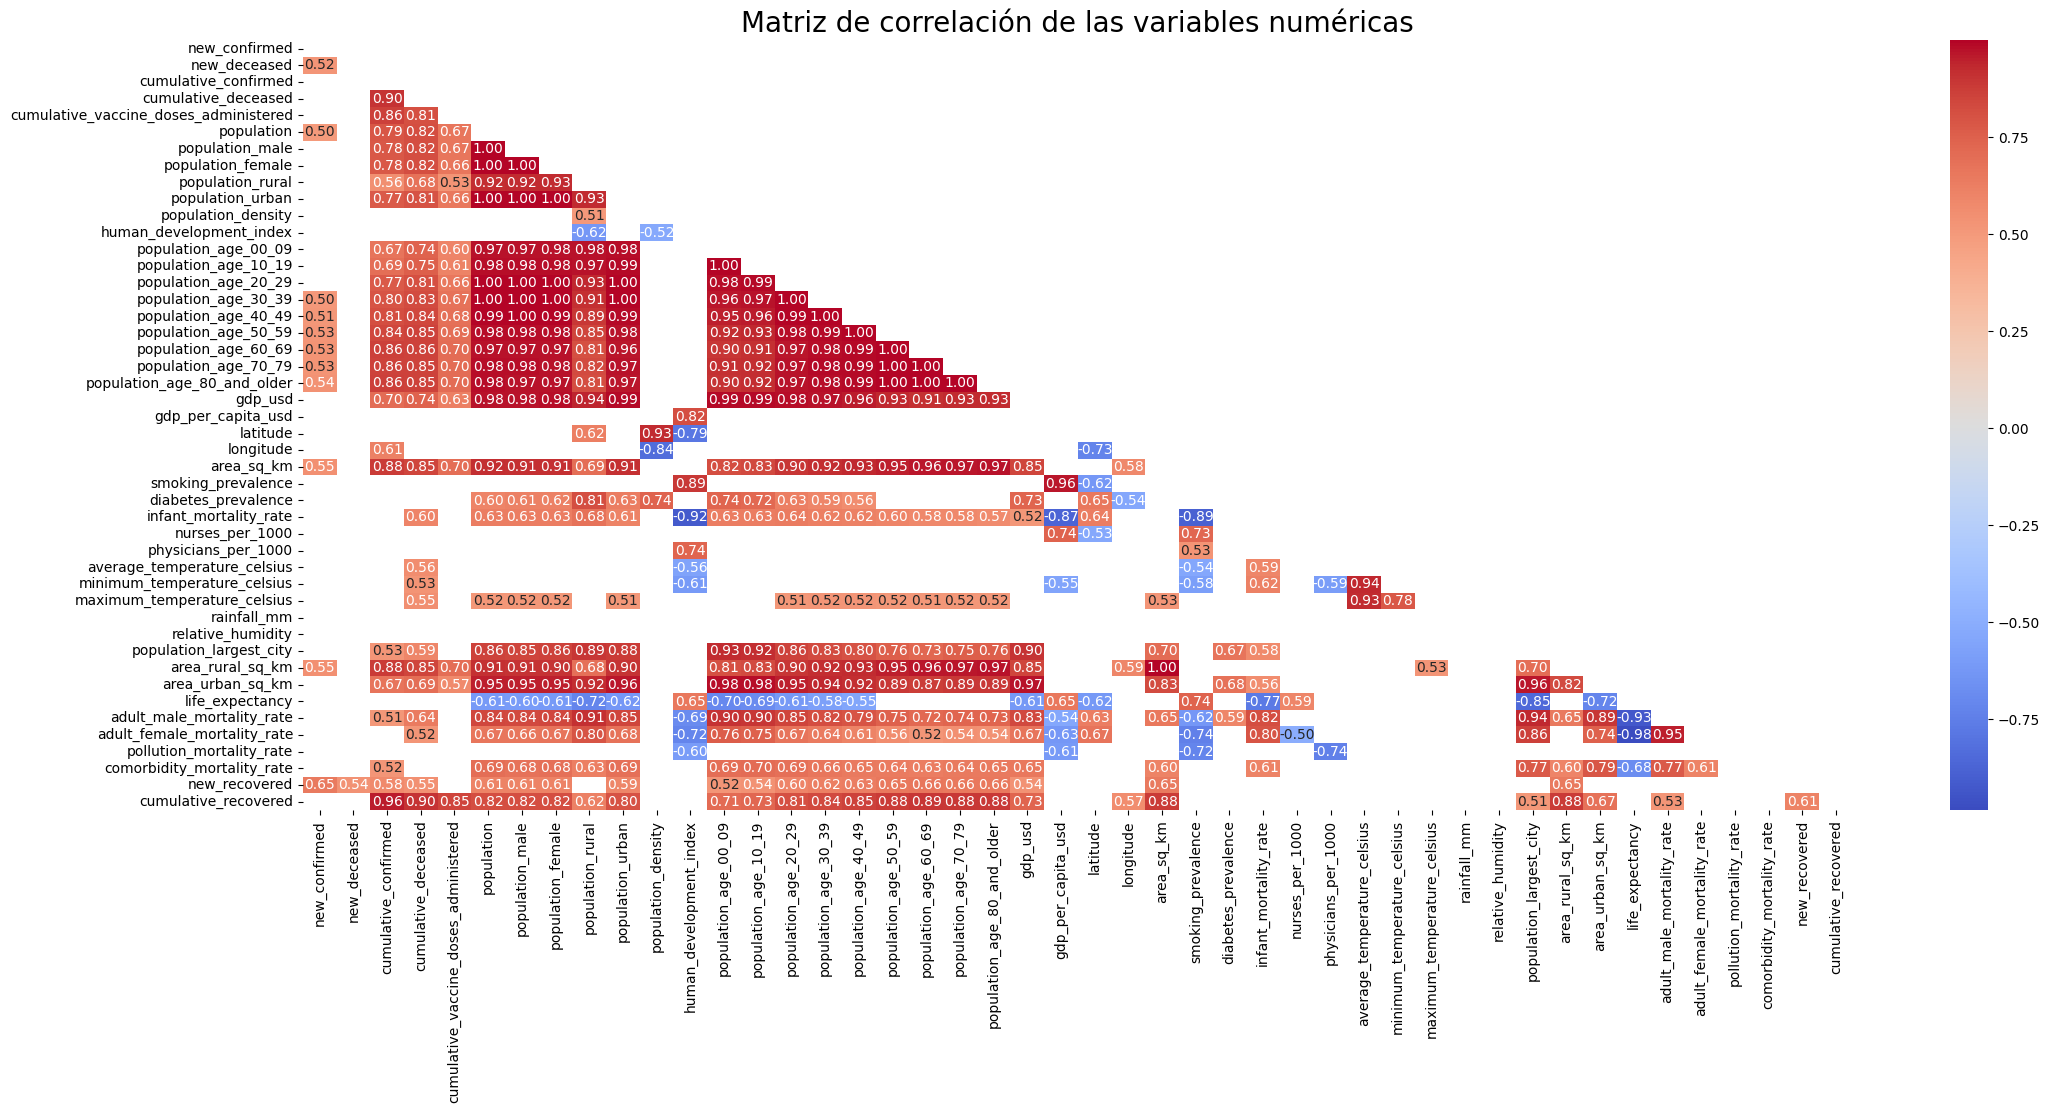

In [76]:
#Creación de la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=["float64","int64"]).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()

#Máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))

#Mostrar valores mayores a 0.5
correlation_matrix = correlation_matrix[abs(correlation_matrix)>abs(0.5)]

#Creación del gráfico
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación de las variables numéricas", fontsize= 20)
plt.show()

En la anterior gráfica se presentan las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.

Ya teniendo una idea de las variables que tienen mayor correlación, se podría hacer un análisis más detallado de estas variables. Esto se puede hacer en un análisis posterior y una toma de decisiones para la creación de un modelo ML.

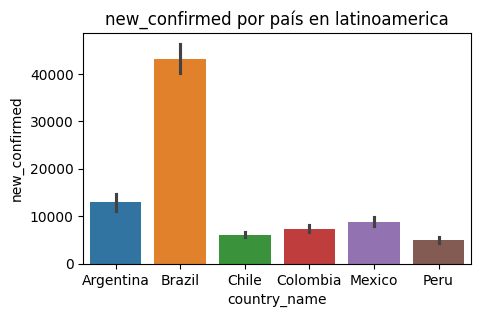

In [77]:
fig, ax = plt.subplots(figsize = (5,3))
sns.barplot(x="country_name",y="new_confirmed",data=data_latinoamerica_paises,ax=ax,hue="country_name")
plt.title("new_confirmed por país en latinoamerica")
plt.show()

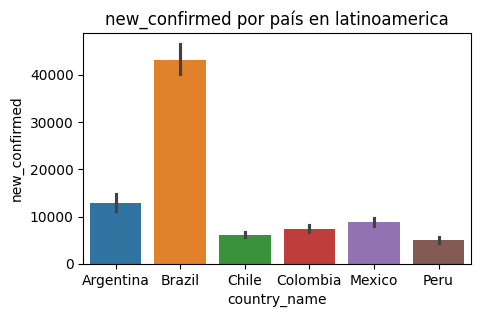

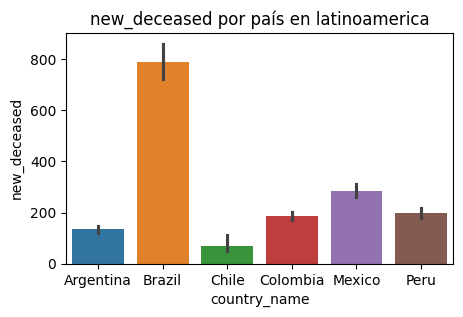

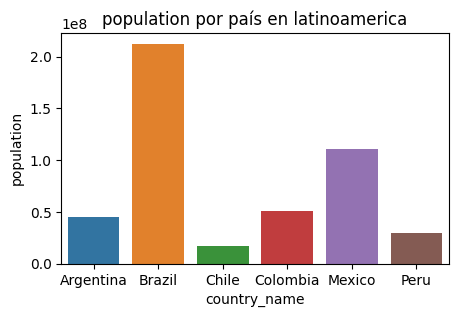

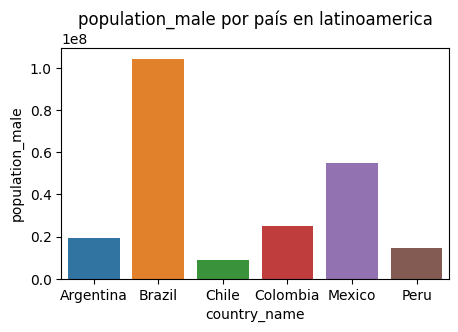

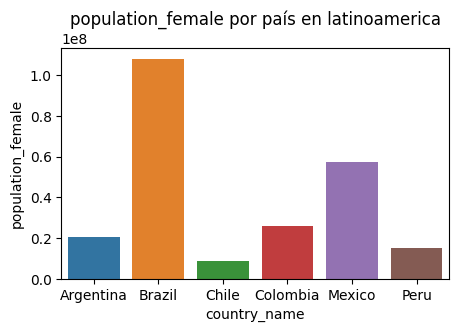

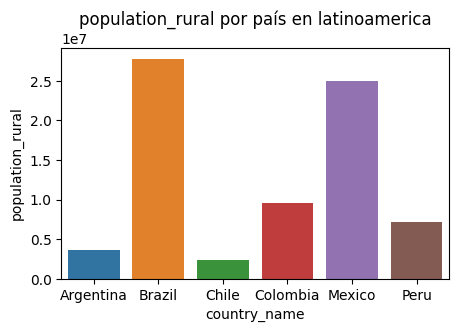

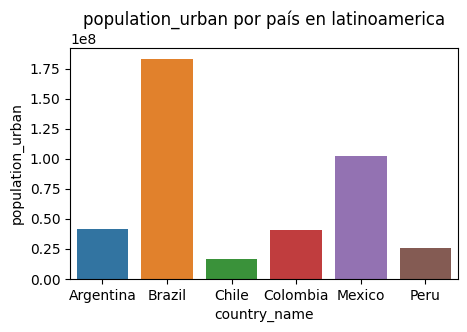

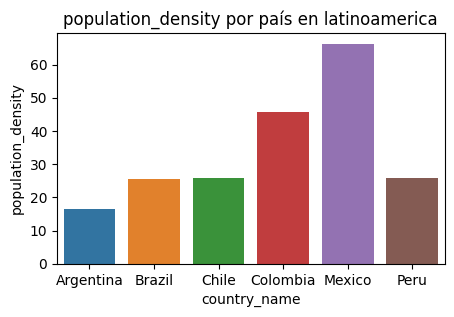

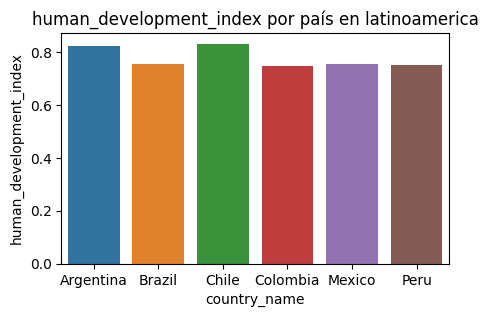

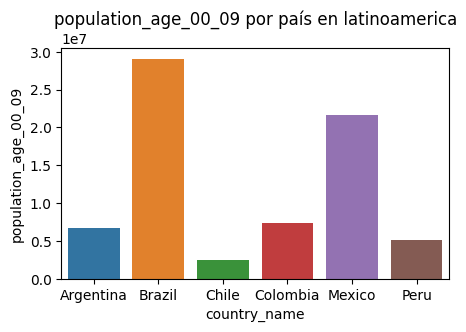

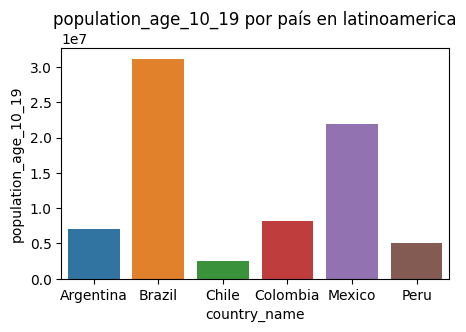

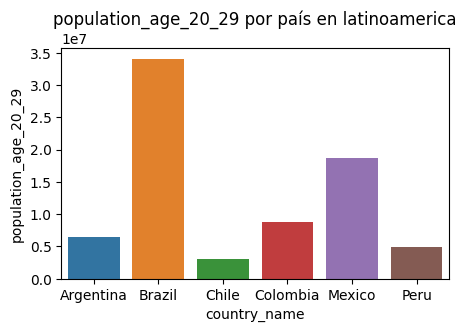

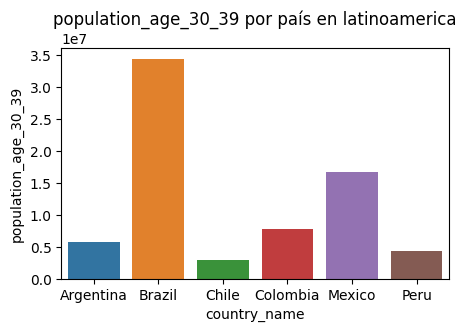

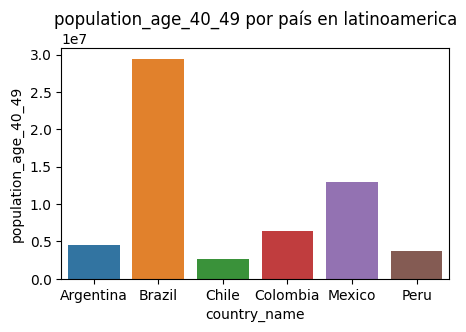

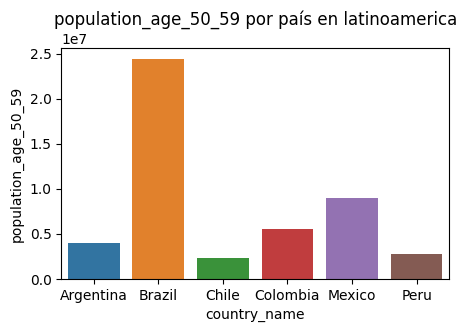

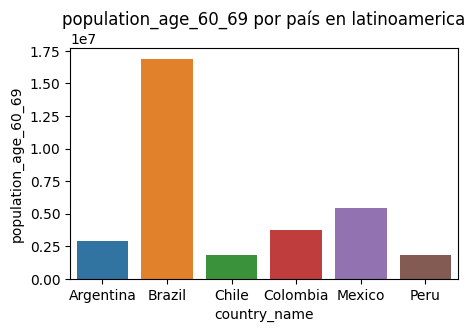

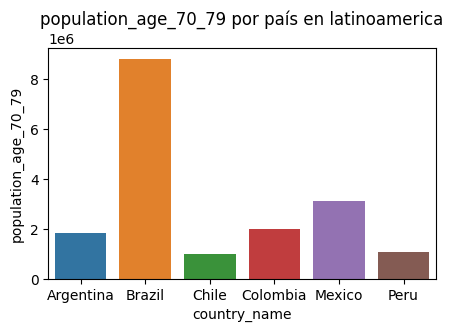

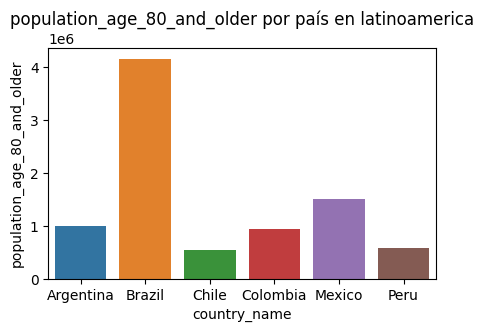

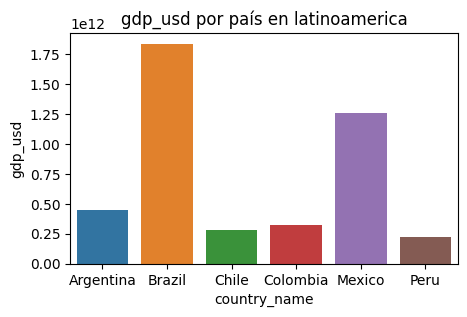

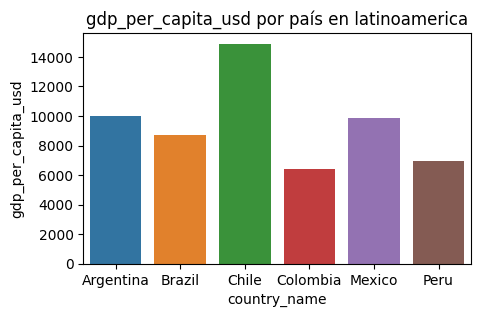

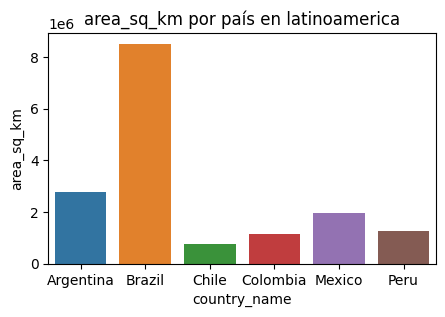

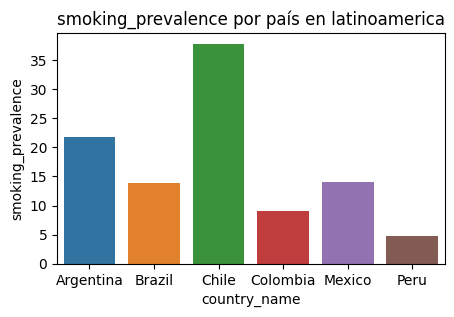

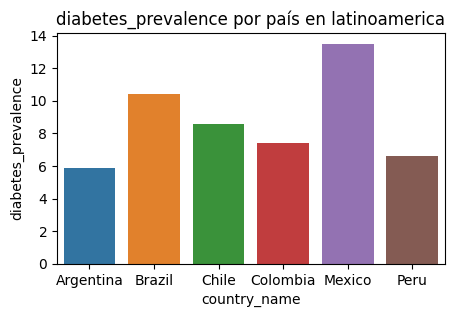

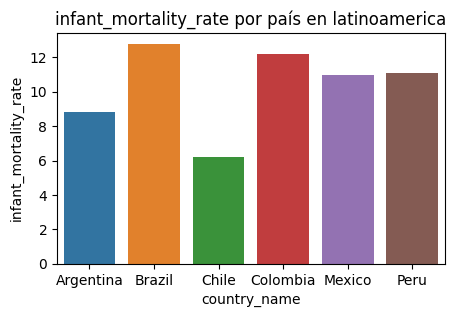

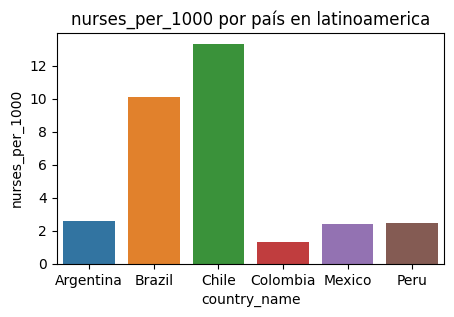

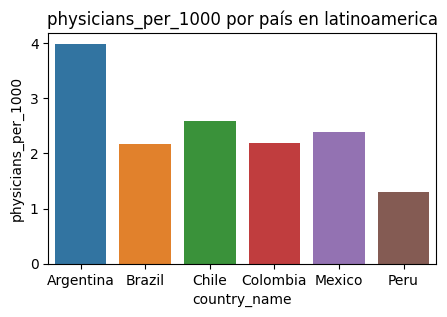

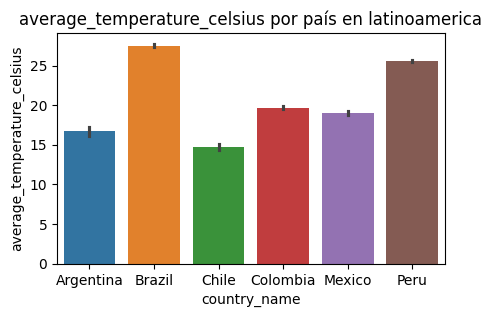

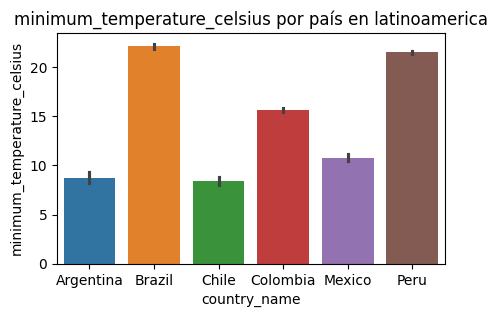

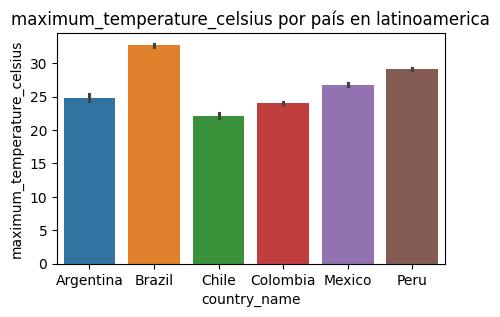

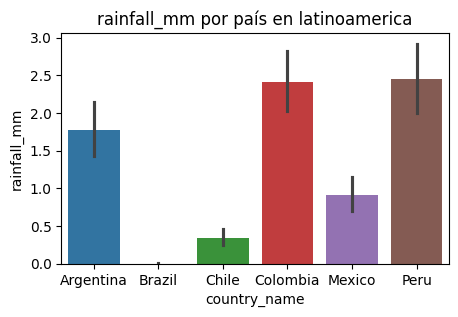

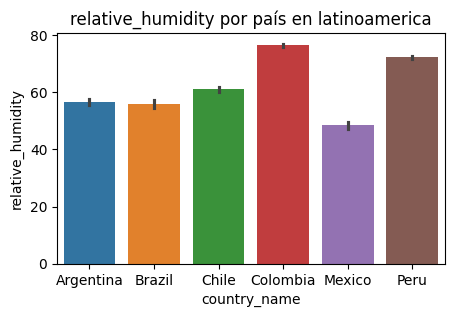

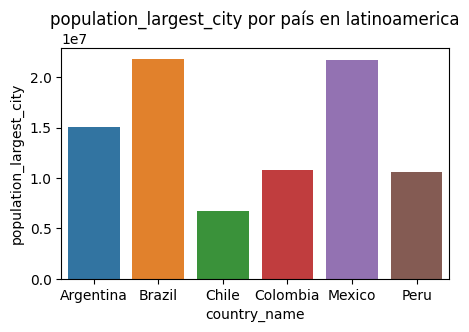

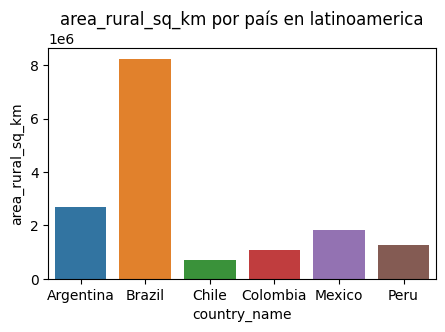

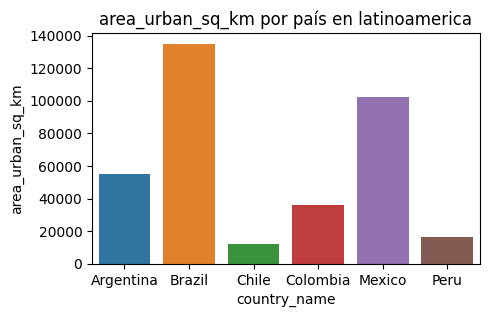

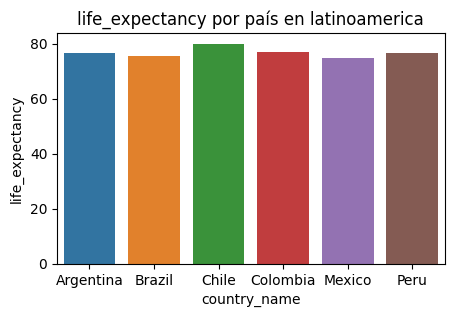

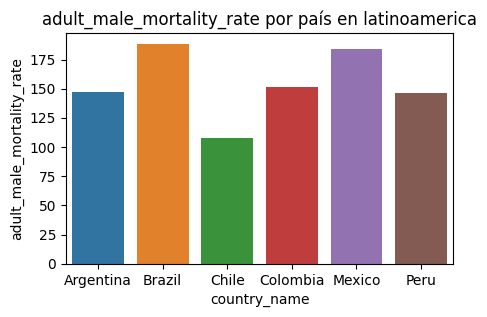

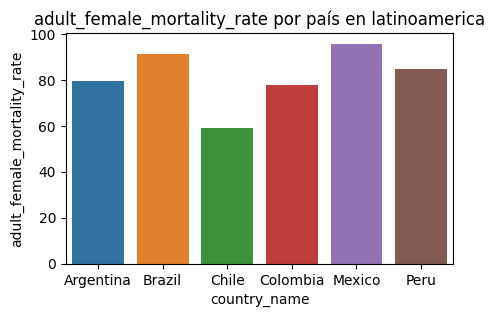

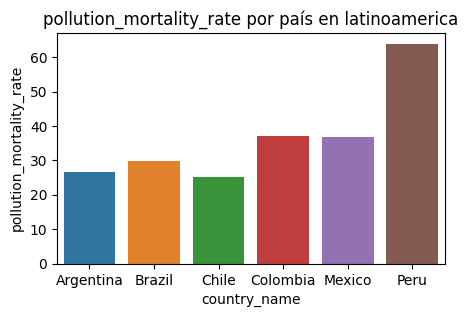

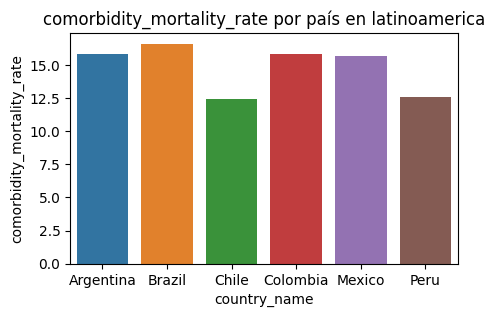

In [78]:
#Diagrama de barras por cada país en data_latinoamerica_paises con 6 columnas
for i in data_latinoamerica_paises.columns:
    if i not in ["location_key","date","country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_recovered","cumulative_vaccine_doses_administered","new_recovered","cumulative_deceased"]:
        fig, ax = plt.subplots(figsize = (5,3))
        sns.barplot(x="country_name",y=i,data=data_latinoamerica_paises,ax=ax,hue="country_name")
        plt.title(f"{i} por país en latinoamerica")
        plt.show()

Histograma con ciclo for para alguno de los datos:

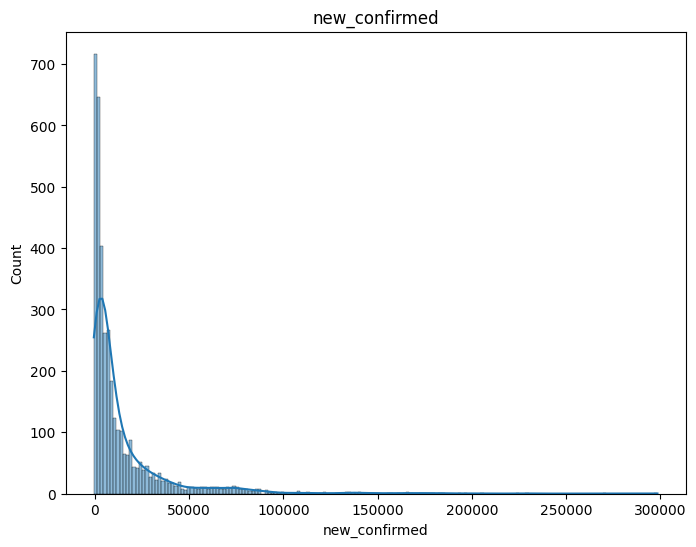

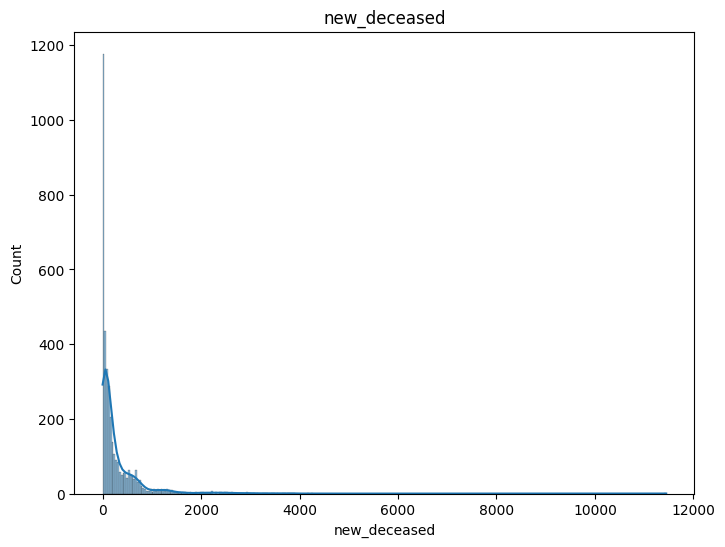

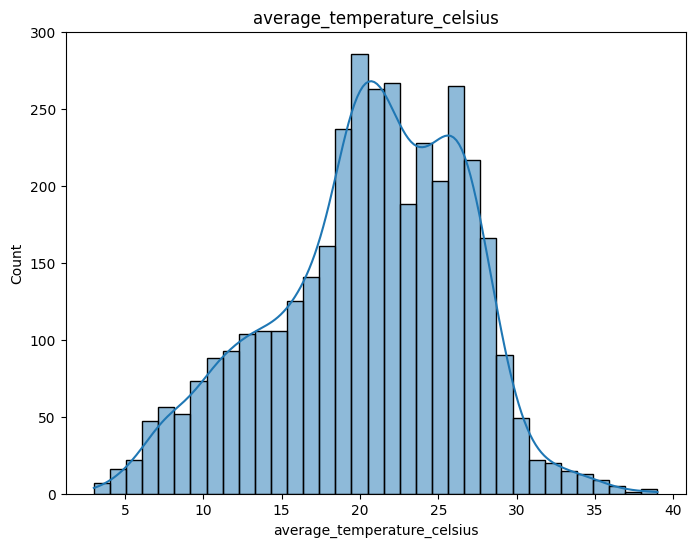

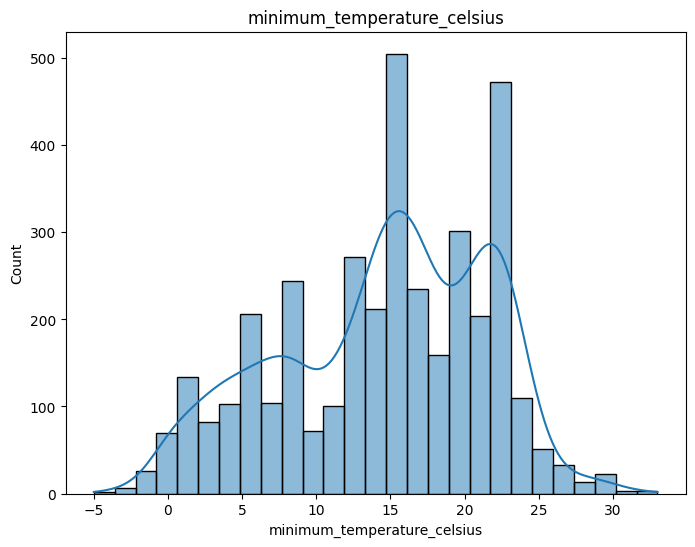

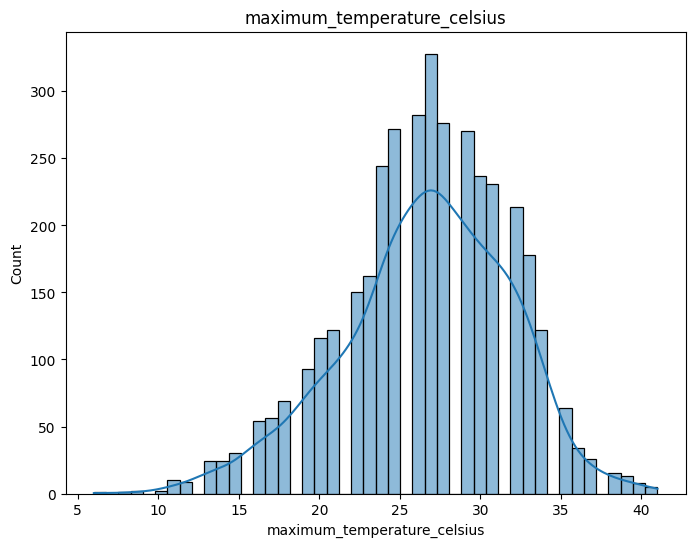

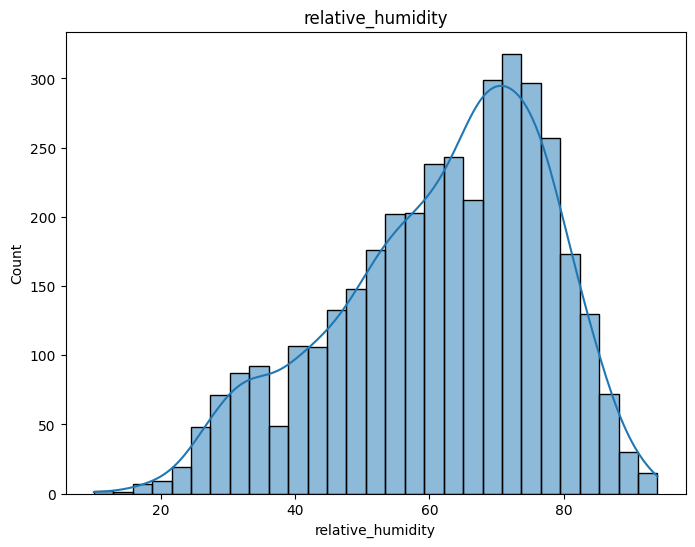

In [79]:
lista_columnas_6 = ["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased","cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius","maximum_temperature_celsius","relative_humidity"]

#Creación de los histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ["location_key","date","country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_recovered","cumulative_vaccine_doses_administered","new_recovered","cumulative_deceased"]:
        fig, ax = plt.subplots(figsize = (8,6))
        sns.histplot(data_latinoamerica_paises[i],kde=True)
        plt.title(i)
        plt.show()

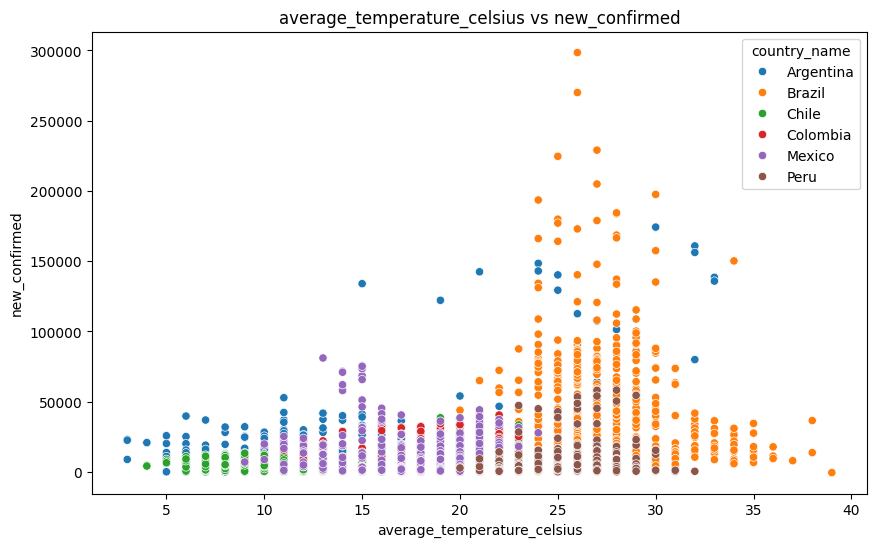

In [80]:
#Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x="average_temperature_celsius",y="new_confirmed",data=data_latinoamerica_paises,hue="country_name")
plt.title("average_temperature_celsius vs new_confirmed")
plt.show()

En algunos paises la temperatura no es influyente en la cantidad de casos confirmados y en otros claramente sí.
Por lo tanto se realizará un análisis de la temperatura promedio con la cantidad de muertes.

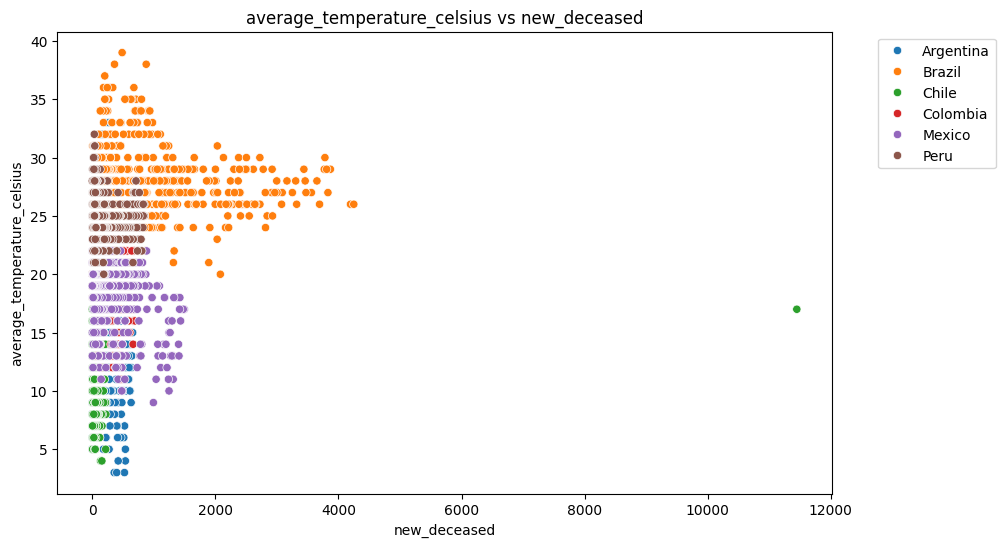

In [81]:
#Average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize= (10,6))
sns.scatterplot(y="average_temperature_celsius",x="new_deceased",data=data_latinoamerica_paises,hue="country_name")
plt.title("average_temperature_celsius vs new_deceased")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()

Se observa un comportamiento similar al de los casos confirmados, en algunos países la temperatura no influye en la cantidad de muertes, mientras que en otros países si se puede ver una relación entre estos dos factores.


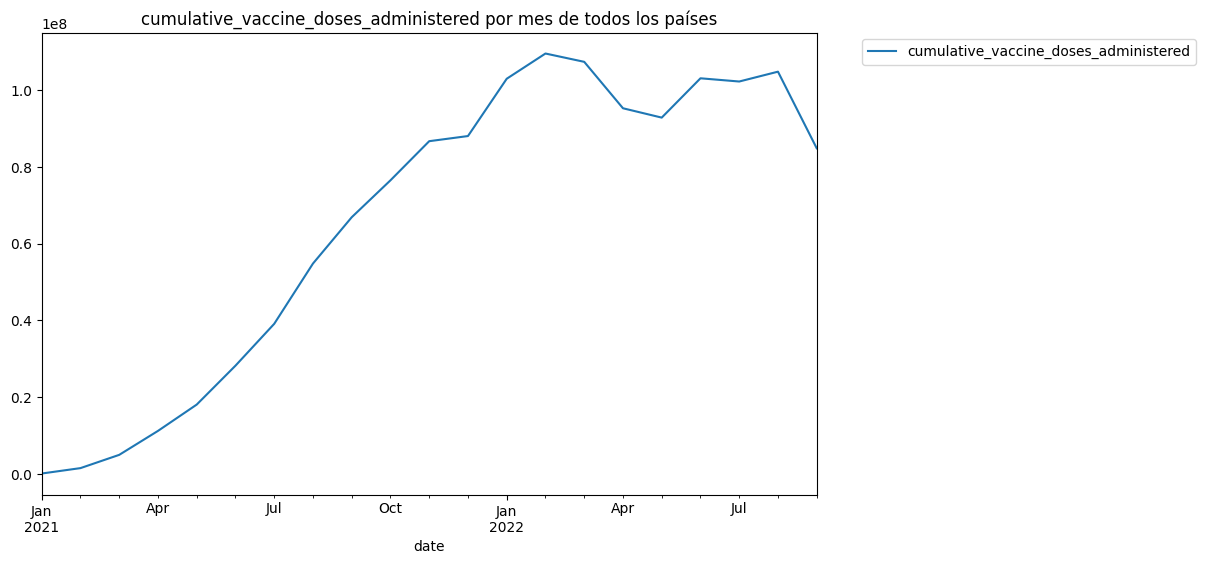

In [82]:
#Valores medios de todos los países cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize= (10,6))
data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.title("cumulative_vaccine_doses_administered por mes de todos los países")
plt.show()

Se observa que la cantidad de dosis administradas en Argentina, Brasil, Chile, Colombia, México y Perú ha ido en aumento a lo largo del tiempo.

Análisis por país para obtener datos más detallados

<function matplotlib.pyplot.show(close=None, block=None)>

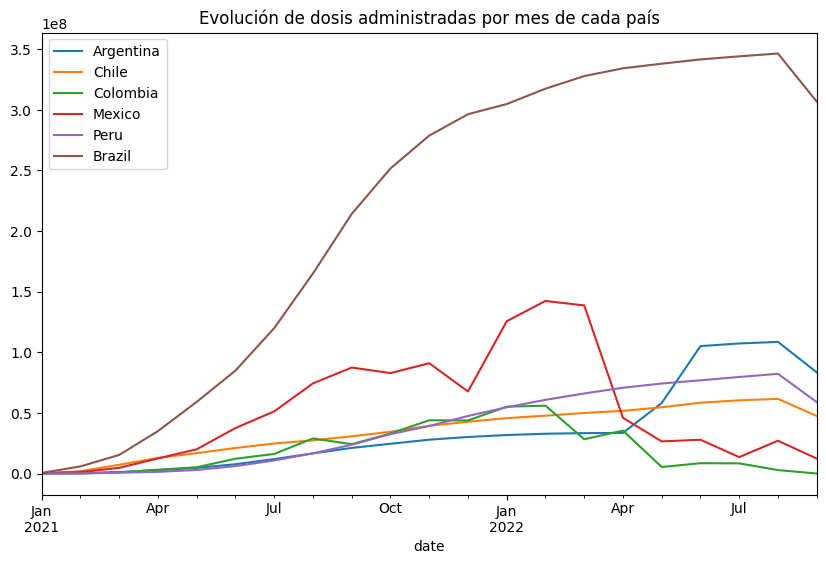

In [83]:
#Dosis administradas mensuales por país
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()

plt.title("Evolución de dosis administradas por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(paises_seleccionados)
plt.show

En un análisis detallado de dosis por mes en cada país se observa que en algunos países la cantidad de dosis ha ido aumentando a lo largo del tiempo, aunque en algunos fue disminuyendo. Los factures pudieron ser varios (cantidad de gente ya vacunada, vacunas a disposición, etc)

<function matplotlib.pyplot.show(close=None, block=None)>

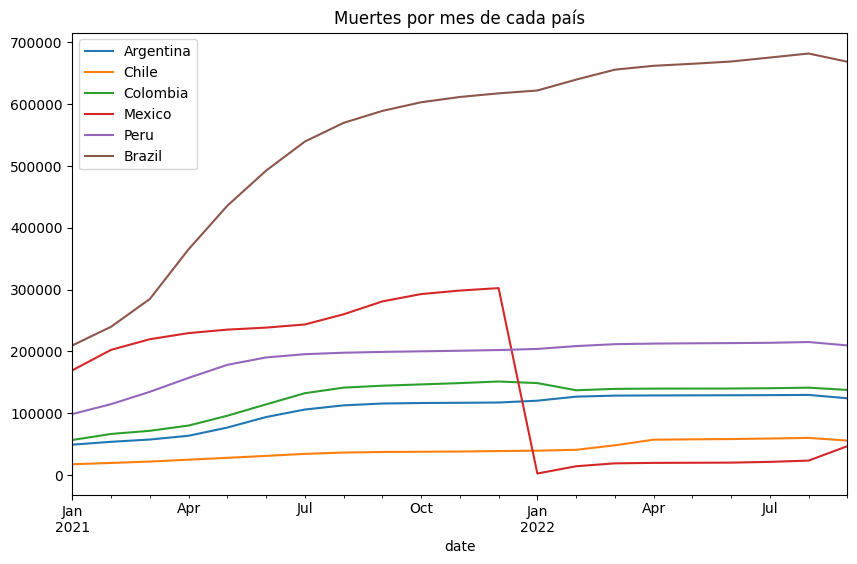

In [84]:
#Muertes mensuales por país
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()

plt.title("Muertes por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(paises_seleccionados)
plt.show

En el gráfico se puede apreciar los paises que más muertes han tenido y los que menos, lo cual también hay que tener en cuenta la cantidad de habitantes de cada uno de ellos.
En México hay una disminución de casos debido a una perdida de datos, por lo que se realizará un estudio en un análisis posterior.

<function matplotlib.pyplot.show(close=None, block=None)>

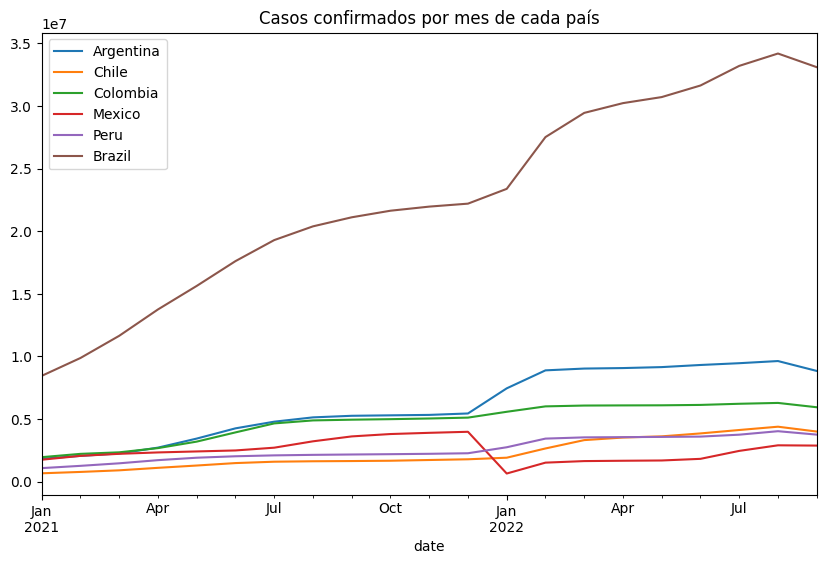

In [85]:
#Casos confirmados mensuales por país
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot()

plt.title("Casos confirmados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Se observa que Brasil fue el que con diferencia tuvo más casos confirmados, seguido de Mexico y luego los otros países. (Siempre teniendo en cuenta que no todos los países tienen la misma cantidad de habitantes)

<function matplotlib.pyplot.show(close=None, block=None)>

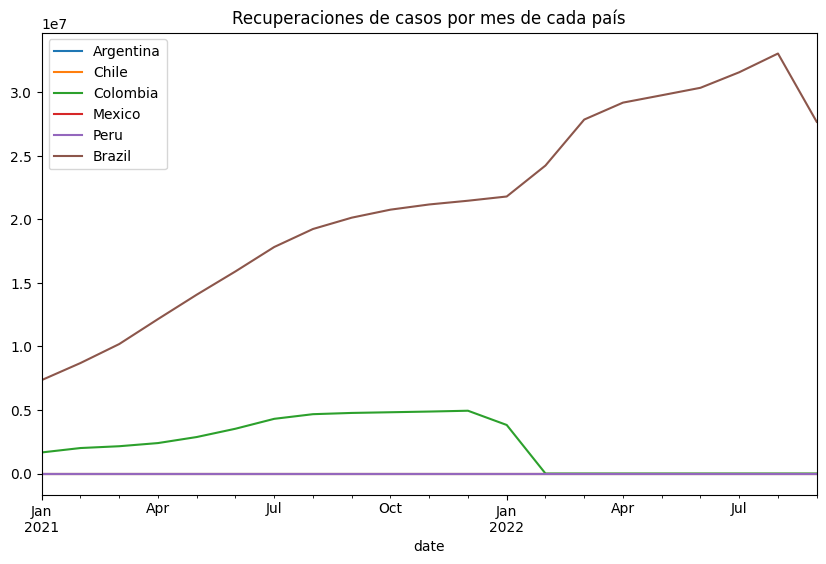

In [86]:
#Recuperaciones de casos mensuales por país
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_recovered"].plot()

plt.title("Recuperaciones de casos por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Con respecto a este apartado no se logra obtener un hallazgo en los datos debido a que la columna de cumulative_recovered contaba con demasiados nulos en la mayoría de los países

<function matplotlib.pyplot.show(close=None, block=None)>

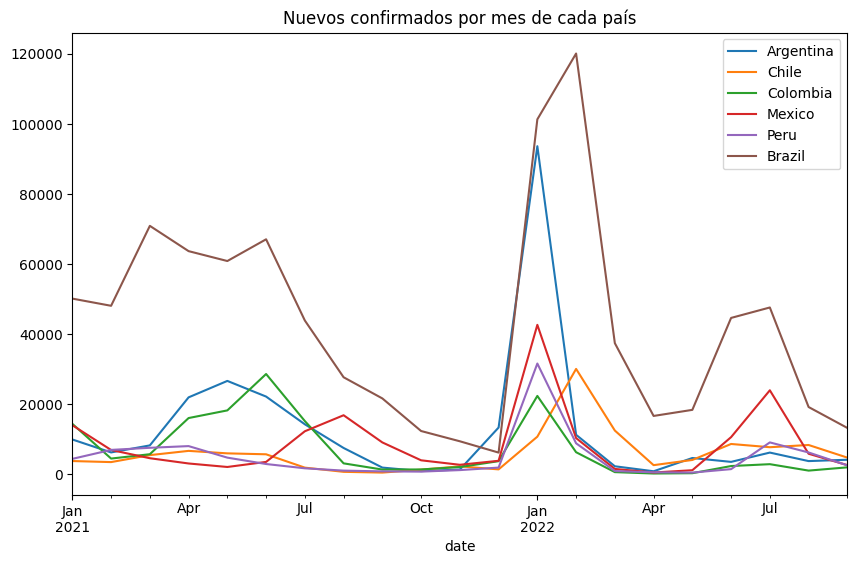

In [87]:
#Nuevos confirmados mensuales por país
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["new_confirmed"].plot()

plt.title("Nuevos confirmados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Claramente se distingue que en los meses donde más nuevos confirmados hay es en las festividades y en los periodos de vacaciones.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

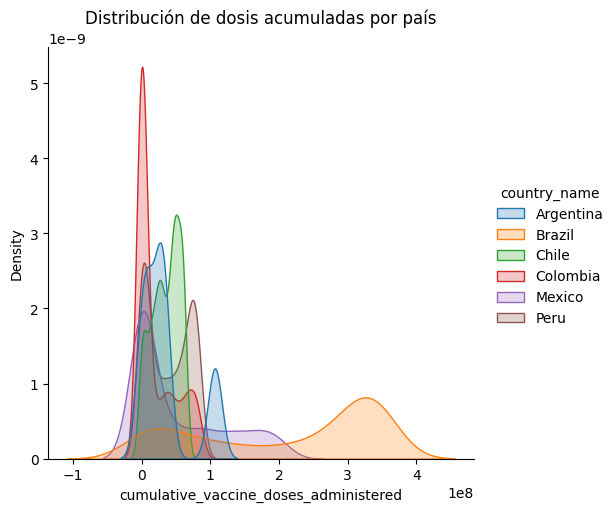

In [88]:
sns.displot(data_latinoamerica_paises,x="cumulative_vaccine_doses_administered",hue="country_name",kind="kde",fill=True)
plt.title("Distribución de dosis acumuladas por país")

Se contempla que Brasil fue el país que peor manejo la pandemia por la cantidad de muertes en comparación a la desproporcionada cantidad de dosis acumuladas, tal vez por medidas tomadas o por otros factores.

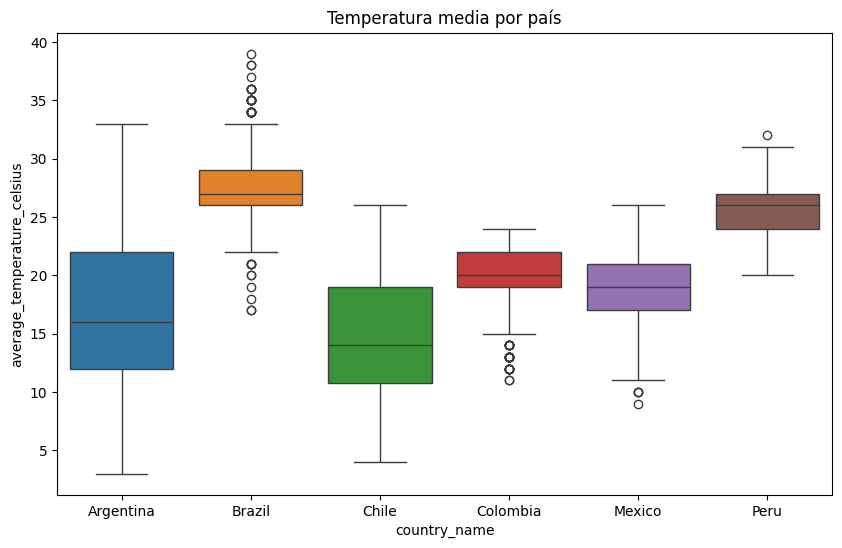

In [89]:
#average_temperature_celsius vs new_confirmed por pais en boxplot
fig, ax= plt.subplots(figsize=(10,6))
sns.boxplot(x="country_name",y="average_temperature_celsius",data=data_latinoamerica_paises,hue="country_name")
plt.title("Temperatura media por país")
plt.show()

Chile y Argentina aunque tengan diferentes rangos de temperaturas, esto no les afectó demasiado con respecto a los nuevos confirmados o las muertes. Por lo que podemos decir que fueron los que mejor manejaron la pandemia.

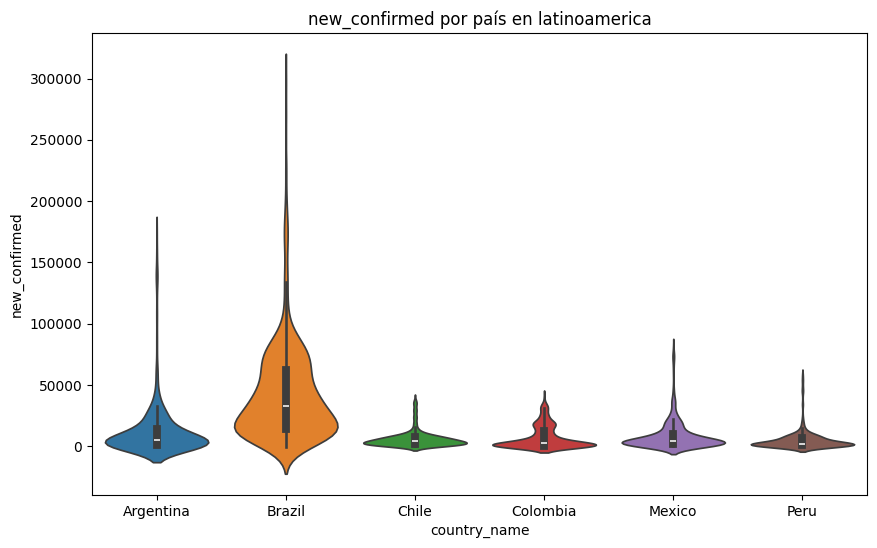

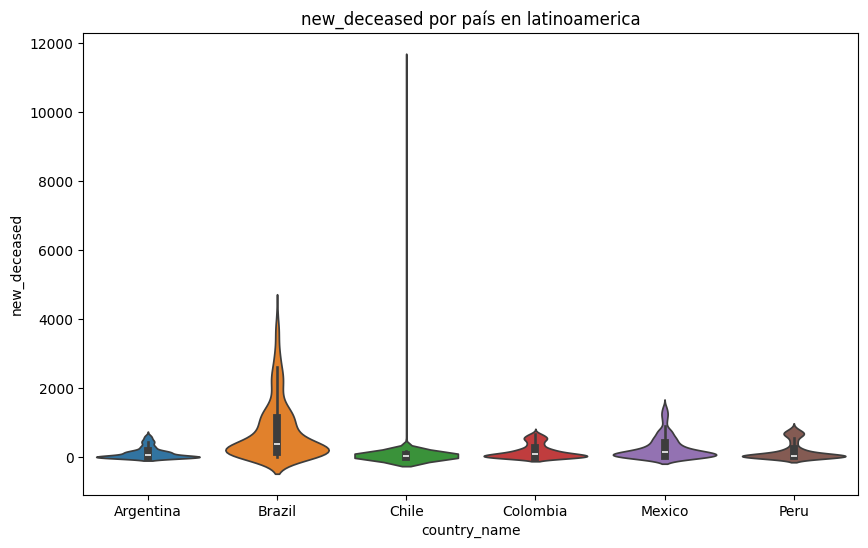

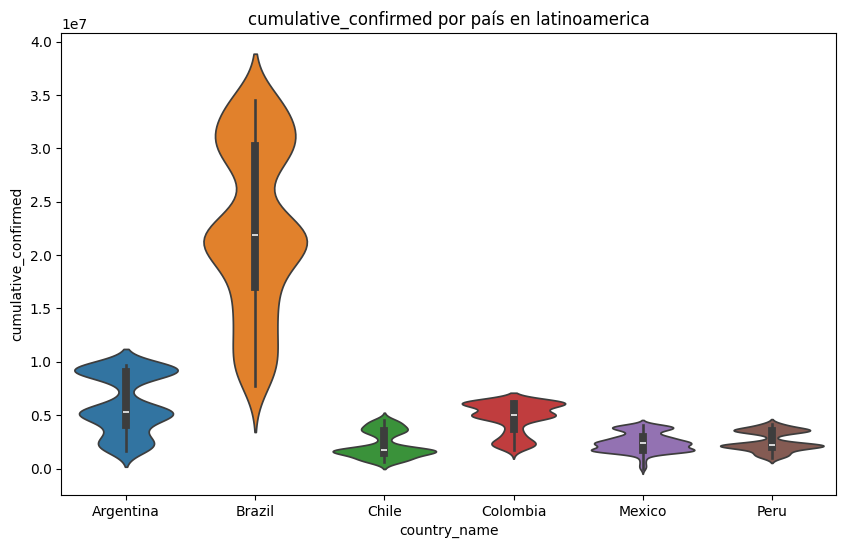

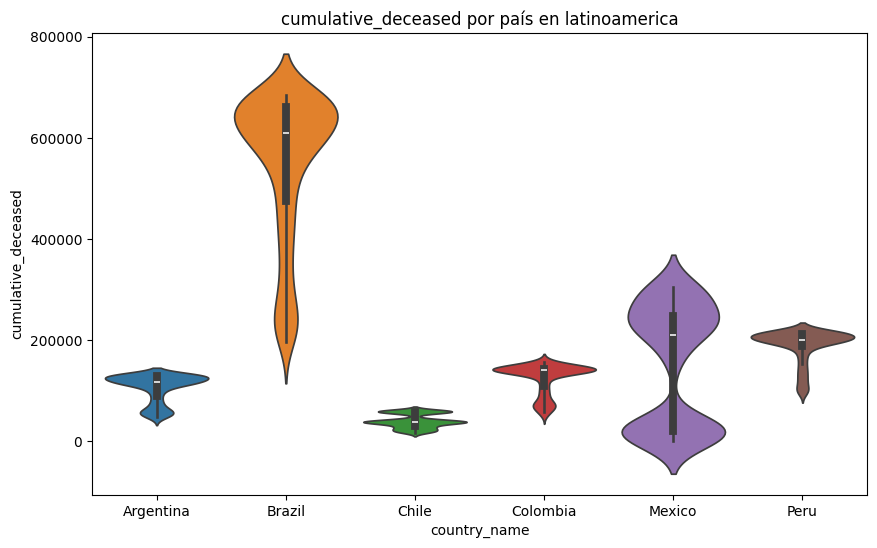

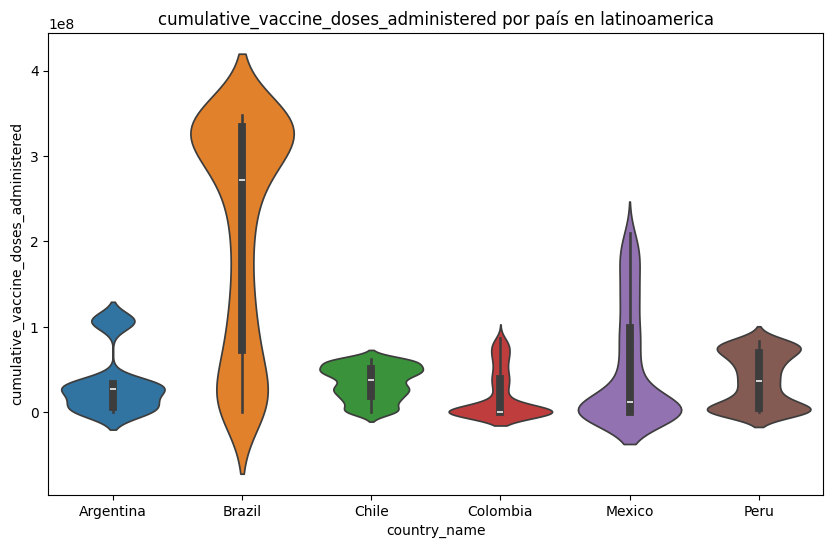

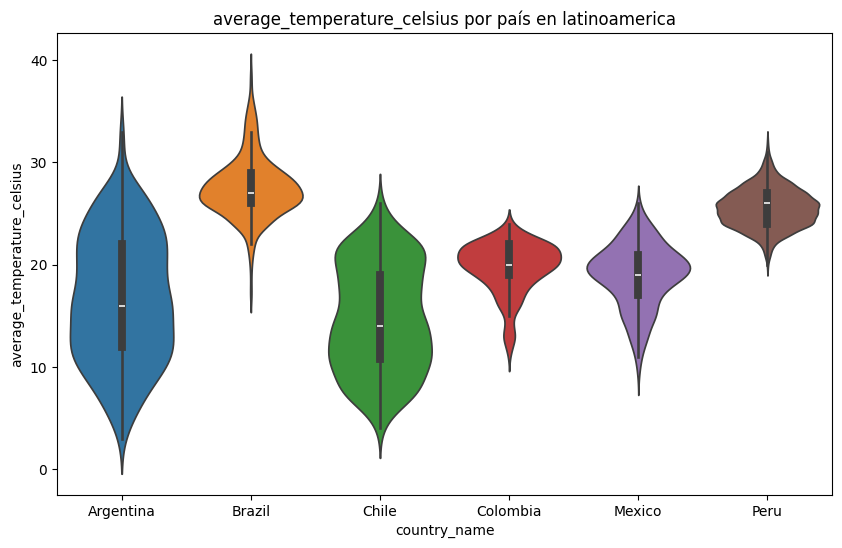

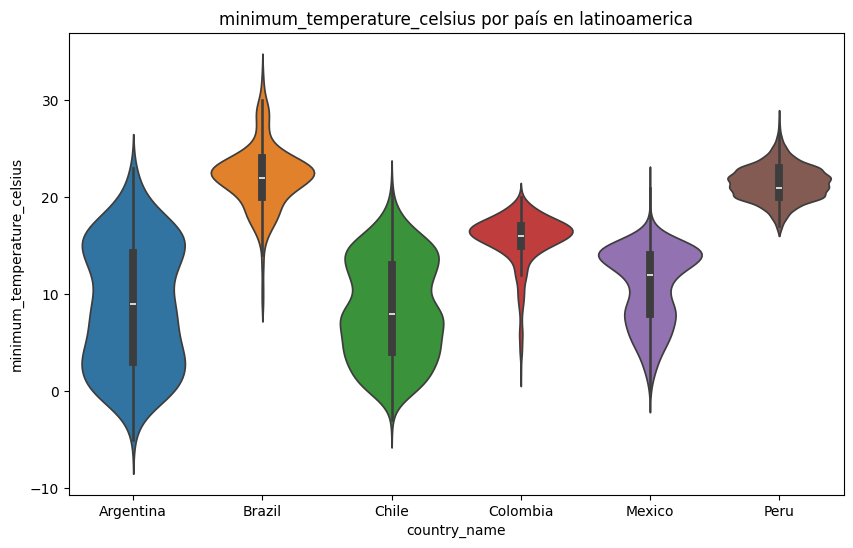

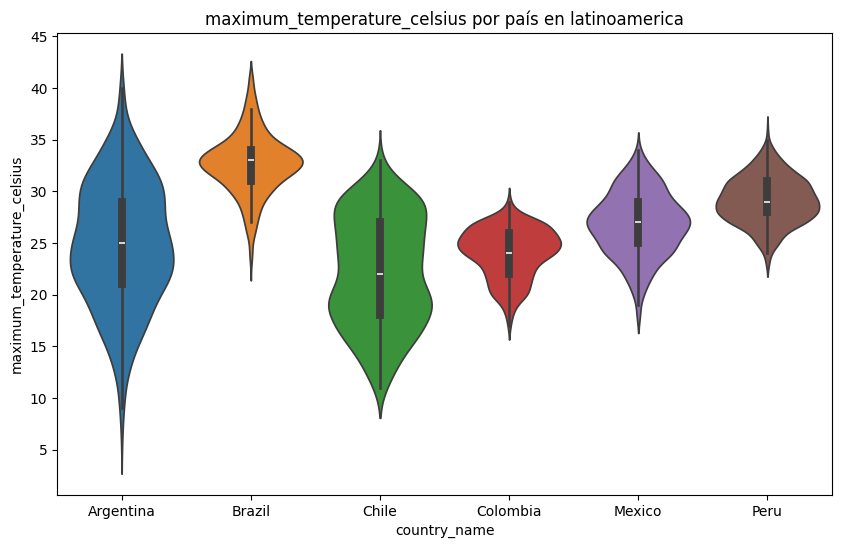

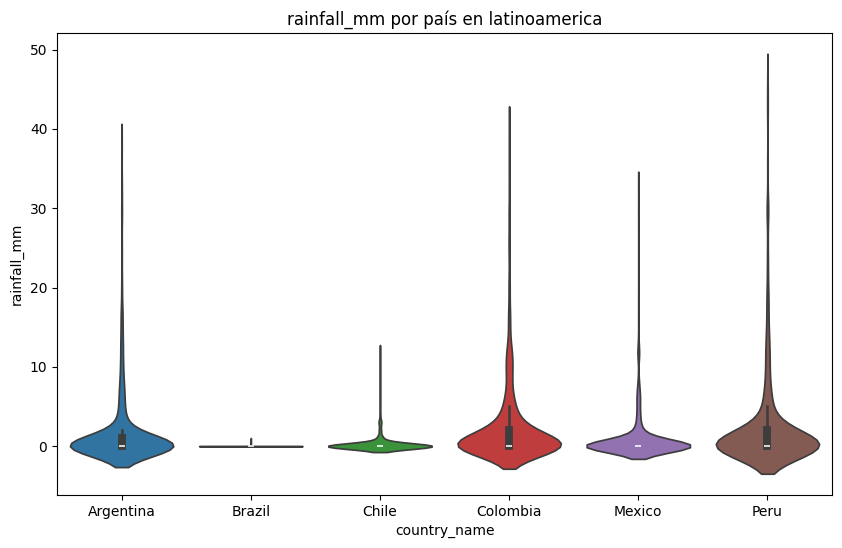

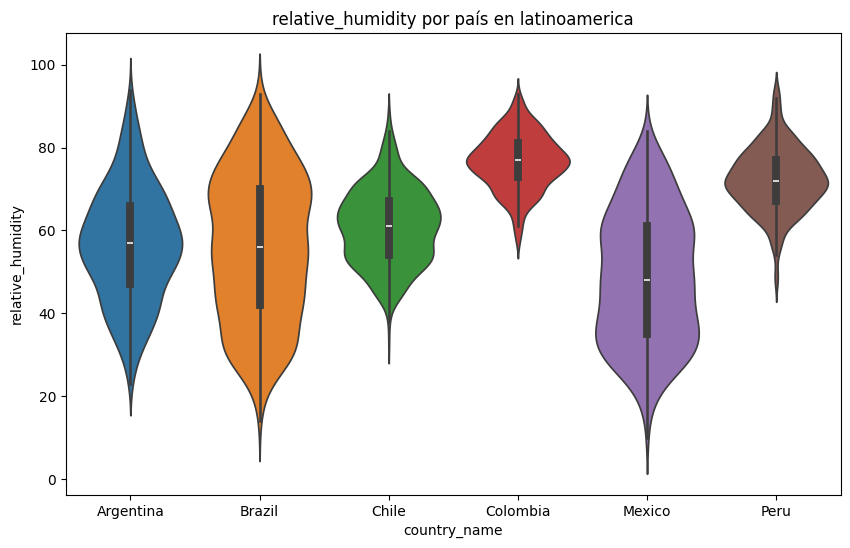

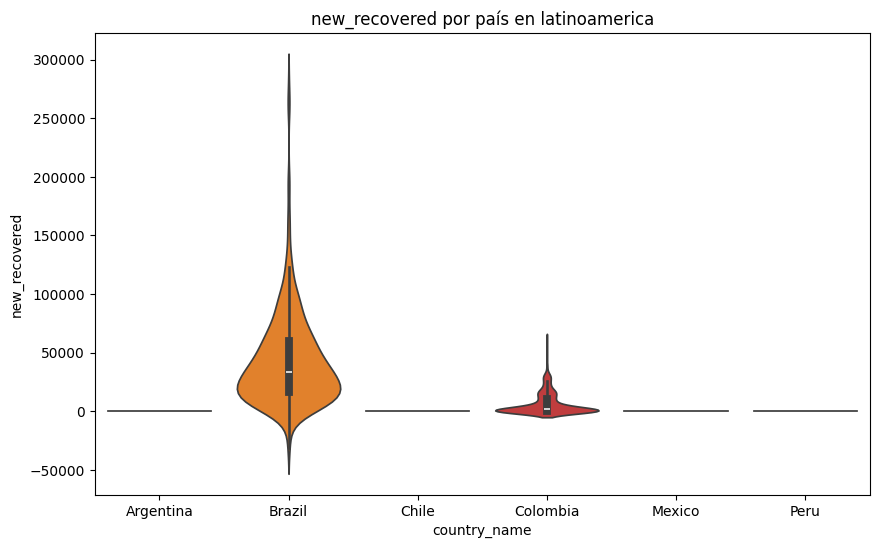

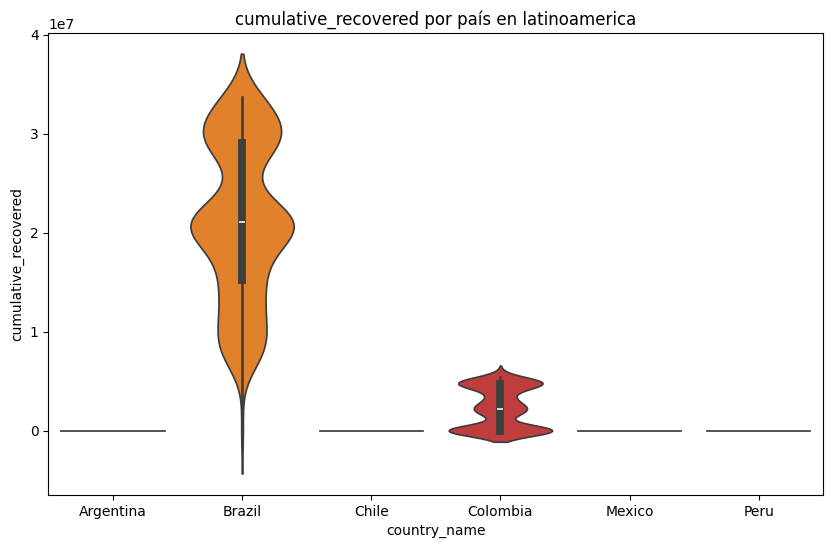

In [90]:
#Creación de un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ["location_key","date","country_code","latitude","longitude"]:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)

#Se agrega a columnas_mayores_6 la columnas country_name para hacer un análisis por país.
columnas_mayores_6.append("country_name")

#Dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

#Violinplot de los paises por variables numéricas
for i in data_latinoamerica_paises_mayores_6:
    if i not in ["location_key","date","country_code","latitude","longitude","country_name"]:
        fig, ax= plt.subplots(figsize=(10,6))
        sns.violinplot(x="country_name",y=i,data=data_latinoamerica_paises_mayores_6,hue="country_name")
        plt.title(f"{i} por país en latinoamerica")
        plt.show()

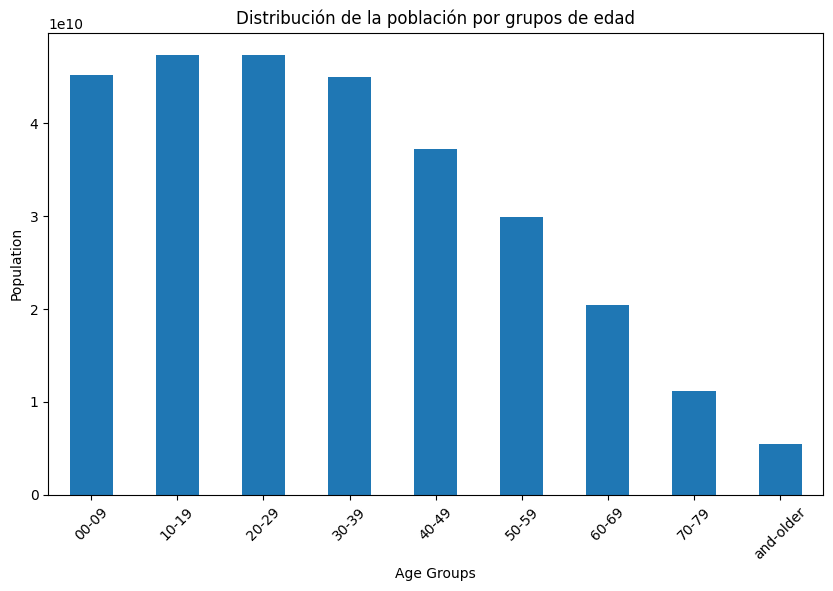

In [91]:
#Distribución de la población por grupos de edad

age_columns= ["population_age_00_09","population_age_10_19","population_age_20_29","population_age_30_39","population_age_40_49","population_age_50_59","population_age_60_69","population_age_70_79","population_age_80_and_older"]
age_distribution = data_latinoamerica_paises[age_columns].sum()

plt.figure(figsize=(10,6))
age_distribution.plot(kind="bar",stacked=True)
plt.xlabel("Age Groups")
plt.ylabel("Population")
plt.title("Distribución de la población por grupos de edad")
plt.xticks(range(len(age_columns)),[col.split("_")[-2] + "-" + col.split("_")[-1] for col in age_columns],rotation= 45)
plt.show()

Se puede observar en esta gráfica la población por grupo de edad en cada país, siendo los grupos más grandes los niños y jovenes adultos.

Se graficará la mortalidad por género para identificar la población más vulnerable en cada país. Ésto nos sería de ayuda para identificar cuál es la población a vacunar primero.

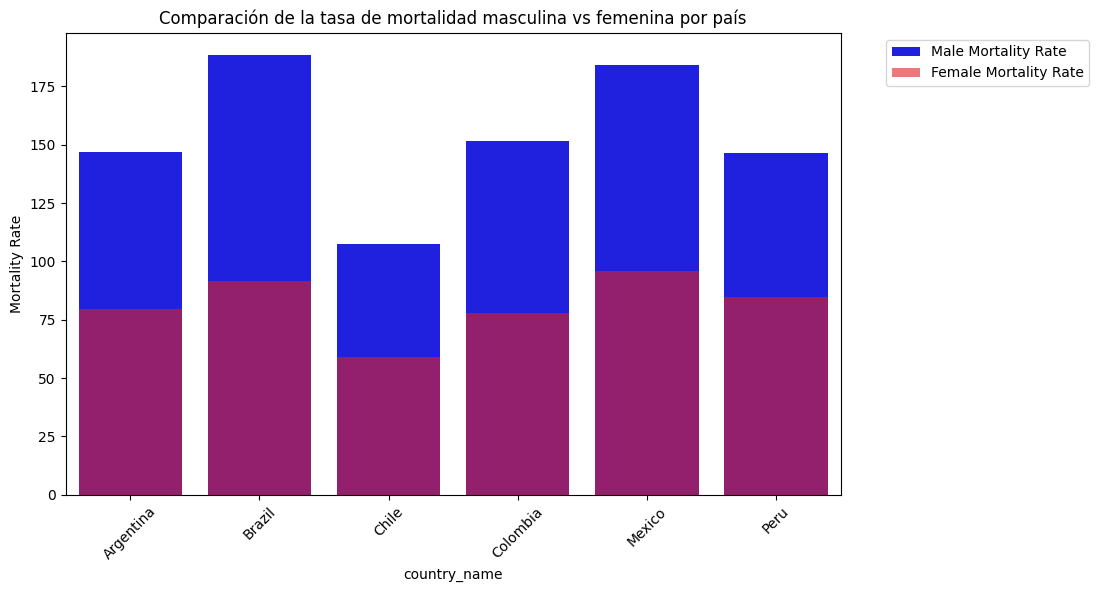

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises,x="country_name",y="adult_male_mortality_rate",color="blue",label="Male Mortality Rate")
sns.barplot(data=data_latinoamerica_paises,x="country_name",y="adult_female_mortality_rate",color="red",alpha=0.6,label="Female Mortality Rate")
plt.xticks(rotation=45)
plt.ylabel("Mortality Rate")
plt.title("Comparación de la tasa de mortalidad masculina vs femenina por país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()

De acuerdo con la anterior gráfica se observa que en todos los países hay una mayor tasa de mortalidad de hombres que de mujeres. Podemos así concluir que los hombres están mejor protegidos o son más vulnerables ante la enfermedad

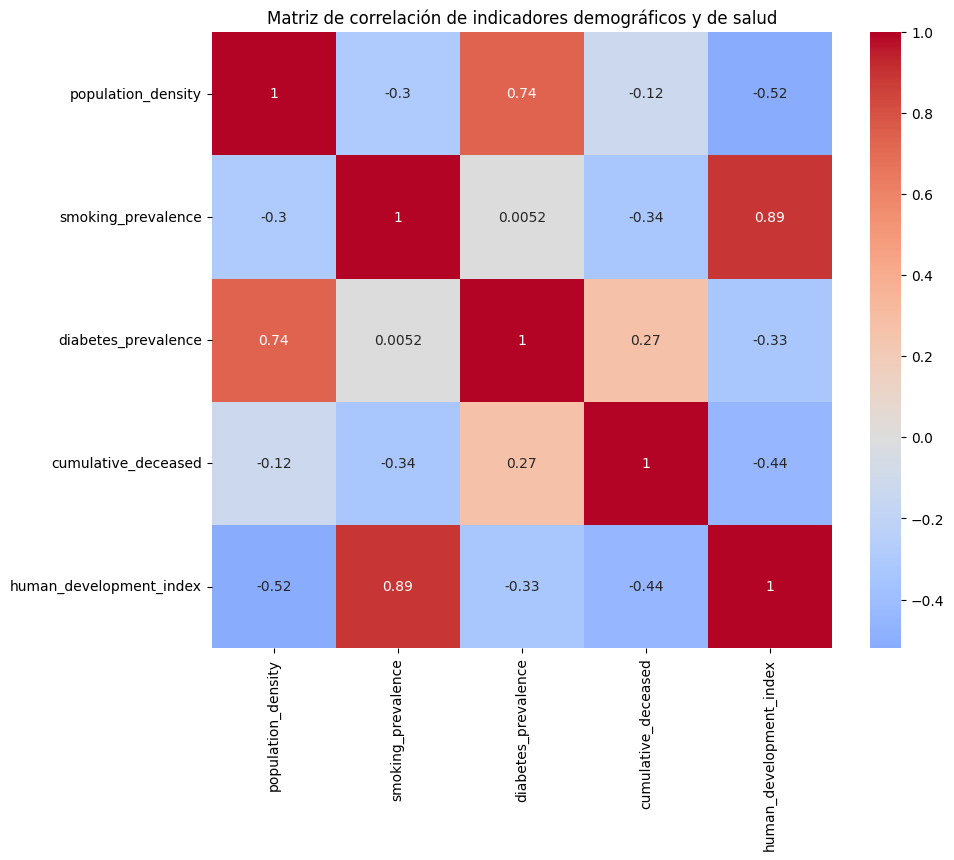

In [93]:
columns = ["population_density","smoking_prevalence","diabetes_prevalence","cumulative_deceased","human_development_index"]
correlation_matrix = data_latinoamerica_paises[columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",center=0)
plt.title("Matriz de correlación de indicadores demográficos y de salud")
plt.show()

Gracias a esta matriz se observó que la diabetes y fumar son las enfermedades preexistentes que más perjudicaron a la población en los países analizados.
De acuerdo a esto ahora se busca ver como se comporta la mortalidad por enfermedades preexistentes o comorbilidades.

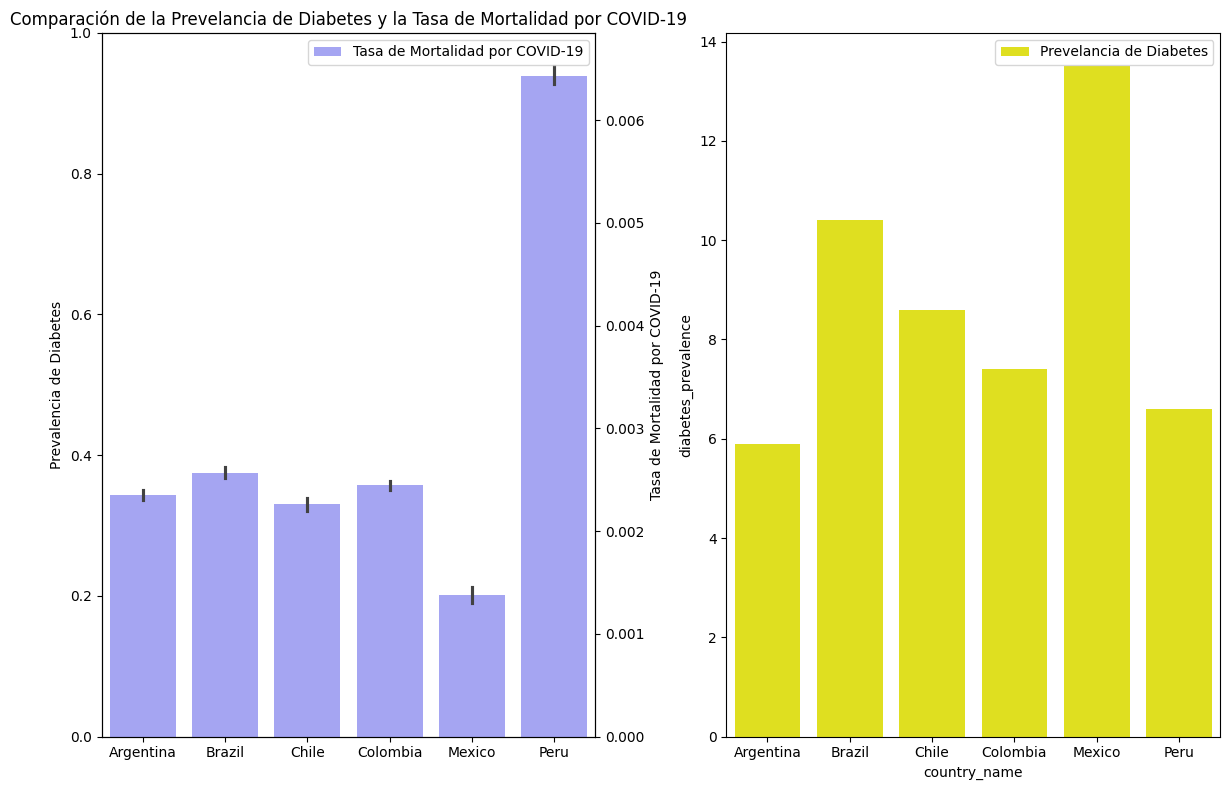

In [94]:
fig,(ax,ax2) = plt.subplots(1,2,figsize=(12,8))
sns.barplot(data=data_latinoamerica_paises,x=data_latinoamerica_paises["country_name"],y=data_latinoamerica_paises["diabetes_prevalence"],color="yellow",label="Prevelancia de Diabetes")
ax2 = ax.twinx()
sns.barplot(data_latinoamerica_paises,x=data_latinoamerica_paises["country_name"],y=data_latinoamerica_paises["cumulative_deceased"] / data_latinoamerica_paises["population"],color="Blue",label="Tasa de Mortalidad por COVID-19",ax=ax2,alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel("Prevalencia de Diabetes")
ax2.set_ylabel("Tasa de Mortalidad por COVID-19")
plt.title("Comparación de la Prevelancia de Diabetes y la Tasa de Mortalidad por COVID-19")
plt.tight_layout()
plt.show()

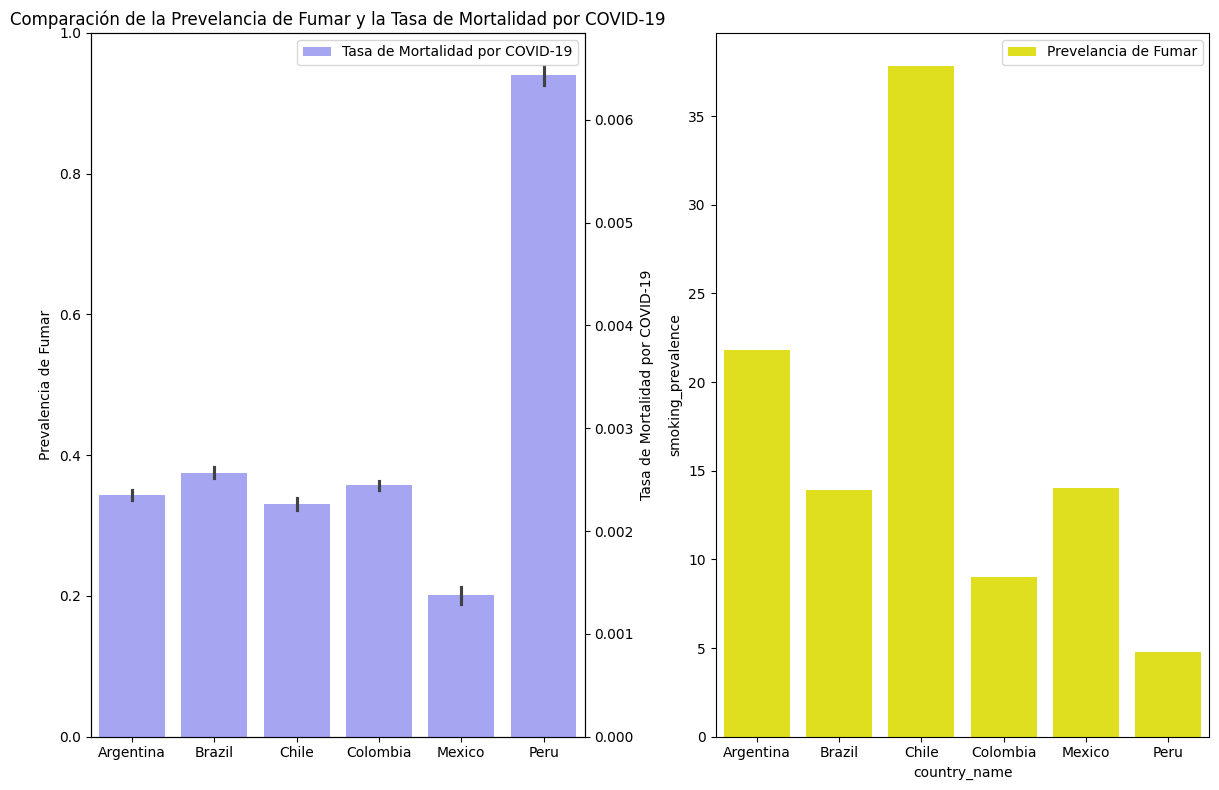

In [95]:
fig,(ax,ax2) = plt.subplots(1,2,figsize=(12,8))
sns.barplot(data=data_latinoamerica_paises,x=data_latinoamerica_paises["country_name"],y=data_latinoamerica_paises["smoking_prevalence"],color="yellow",label="Prevelancia de Fumar")
ax2 = ax.twinx()
sns.barplot(data_latinoamerica_paises,x=data_latinoamerica_paises["country_name"],y=data_latinoamerica_paises["cumulative_deceased"] / data_latinoamerica_paises["population"],color="Blue",label="Tasa de Mortalidad por COVID-19",ax=ax2,alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel("Prevalencia de Fumar")
ax2.set_ylabel("Tasa de Mortalidad por COVID-19")
plt.title("Comparación de la Prevelancia de Fumar y la Tasa de Mortalidad por COVID-19")
plt.tight_layout()
plt.show()

Ambas enfermedades muestran un comportamiento similar, sin embargo la diabetes se observa como la que más muertes generó, seguido de fumar.

Conclución: Los países que se vieron más afectados por el COVID-19 fueron Brasil, Mézico y Colombia. Son los que más casos y muertes han tenido, además de ser los que menos vacunas han administrado.

## Avance 3

Análisis del comportamiento semanalmente y anualmente.

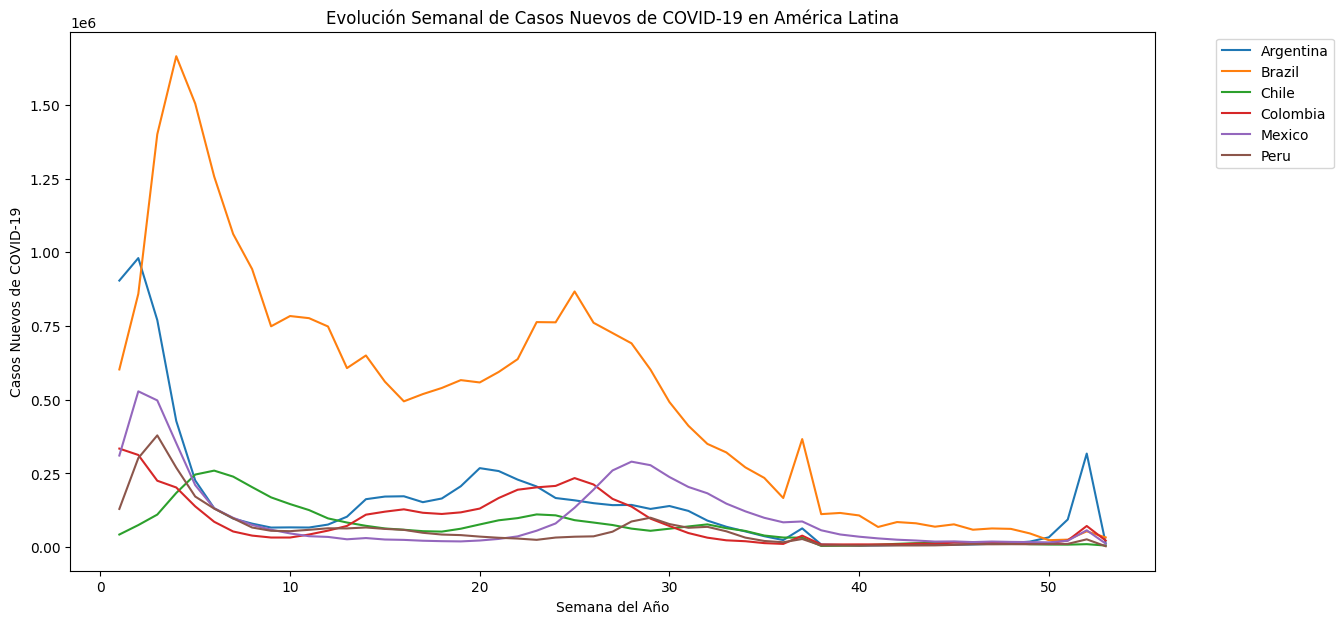

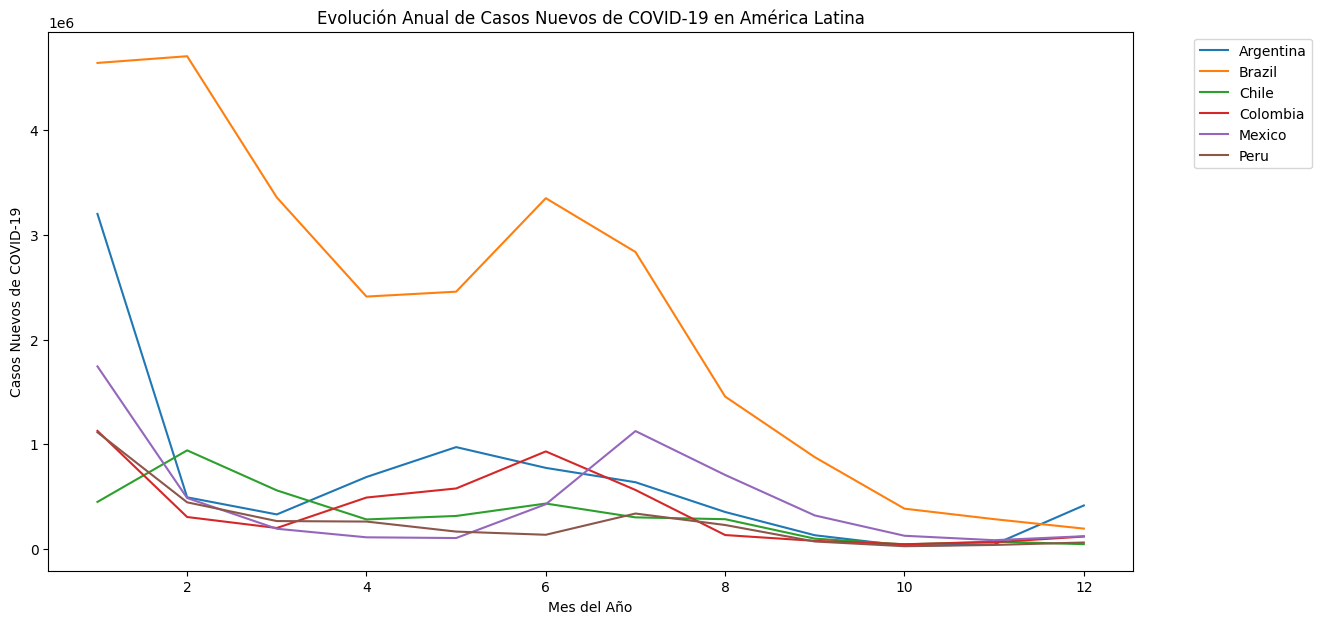

In [96]:
data_latinoamerica_paises["week"] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises["year"] = data_latinoamerica_paises.index.isocalendar().year
weekly_cases = data_latinoamerica_paises.groupby(["country_name","week"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14,7))
#Por Semana
for country in weekly_cases["country_name"].unique():
    country_weekly_cases=weekly_cases[weekly_cases["country_name"]== country]
    plt.plot(country_weekly_cases["week"],country_weekly_cases["new_confirmed"],label=country)

plt.xlabel("Semana del Año")
plt.ylabel("Casos Nuevos de COVID-19")
plt.title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()

#Por Año
data_latinoamerica_paises["month"]=data_latinoamerica_paises.index.month
yearly_cases = data_latinoamerica_paises.groupby(["country_name","month"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14,7))
for country in yearly_cases["country_name"].unique():
    country_yearly_cases=yearly_cases[yearly_cases["country_name"]== country]
    plt.plot(country_yearly_cases["month"],country_yearly_cases["new_confirmed"],label=country)

plt.xlabel("Mes del Año")
plt.ylabel("Casos Nuevos de COVID-19")
plt.title("Evolución Anual de Casos Nuevos de COVID-19 en América Latina")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()


Se puede observar una disminución de casos y muertes a lo largo del tiempo.

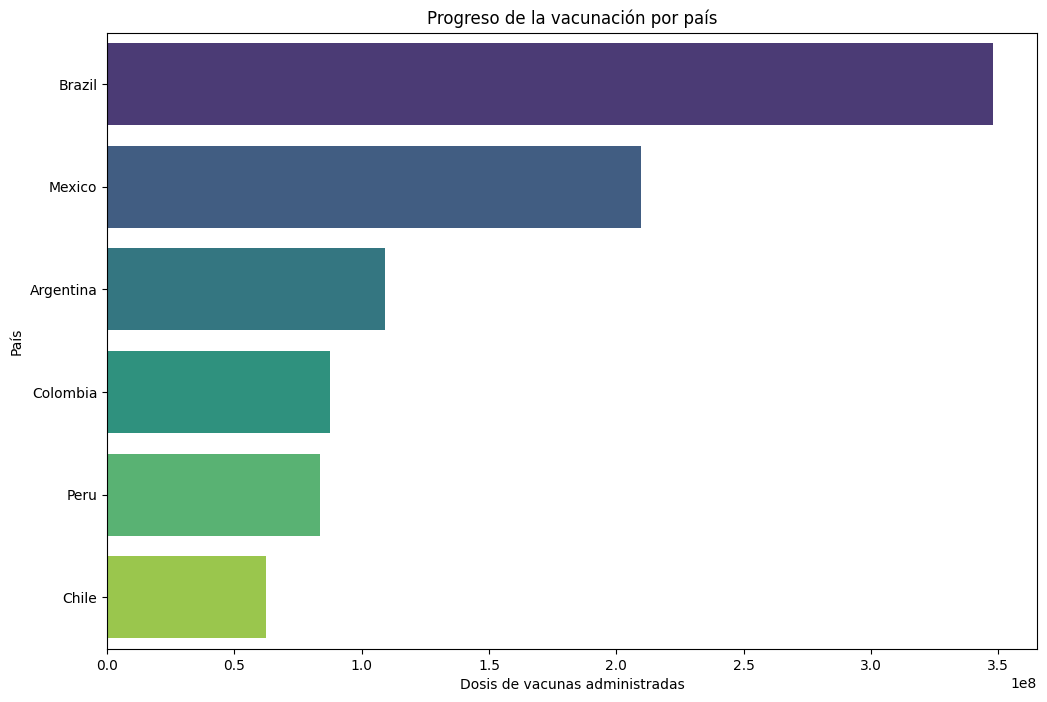

In [97]:
vaccination_data = data_latinoamerica_paises.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values,y=vaccination_data.index,hue=vaccination_data.index,palette="viridis")
plt.xlabel("Dosis de vacunas administradas")
plt.ylabel("País")
plt.title("Progreso de la vacunación por país")

plt.show()

Brasil es el país con más dosis administradas, pero cabe recordar que a su vez es el que más población tiene.

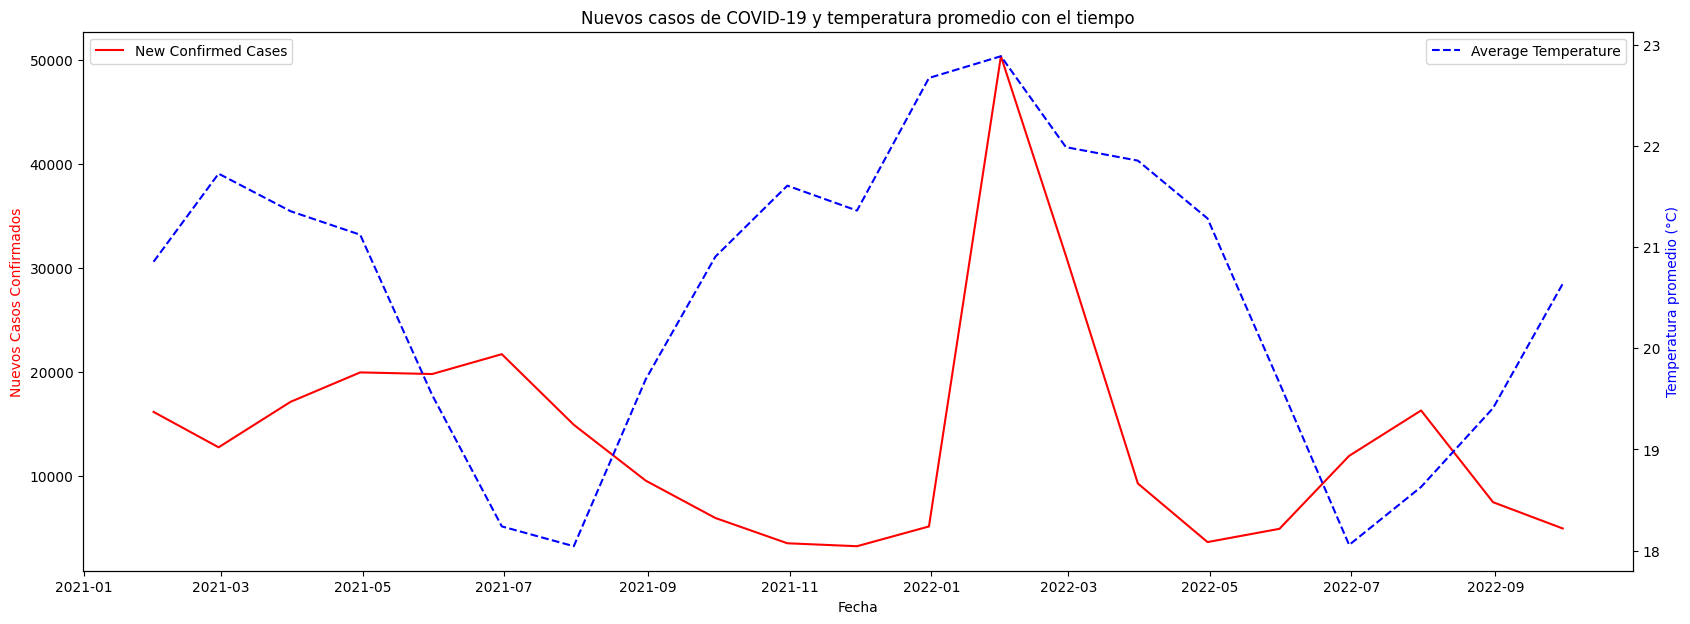

In [98]:
#Temperatura promedio en relación con los nuevos casos
plt.figure(figsize=(20,7))
ax1=plt.gca()
ax2=ax1.twinx()

ax1.plot(data_latinoamerica_paises.resample("ME").mean(numeric_only=True).index, data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["new_confirmed"], color="red", label="New Confirmed Cases")
ax2.plot(data_latinoamerica_paises.resample("ME").mean(numeric_only=True).index, data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["average_temperature_celsius"], color="blue", label="Average Temperature", linestyle="--")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Nuevos Casos Confirmados",color="red")
ax2.set_ylabel("Temperatura promedio (°C)",color="blue")
plt.title("Nuevos casos de COVID-19 y temperatura promedio con el tiempo")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

La temperatura promedio ha ido en aumento y los casos han ido disminuyendo, sin embargo antes del mes de marzo hubo un pico seguido de una disminución inmediata(tal vez tratandose de la acción de las vacunas aplicadas)

Densidad poblacional y urbanización de cada país:

C:\Users\ignac\AppData\Local\Temp\ipykernel_30576\1840327185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases["urban_population_percentage"],y=urban_cases.index,palette="viridis")


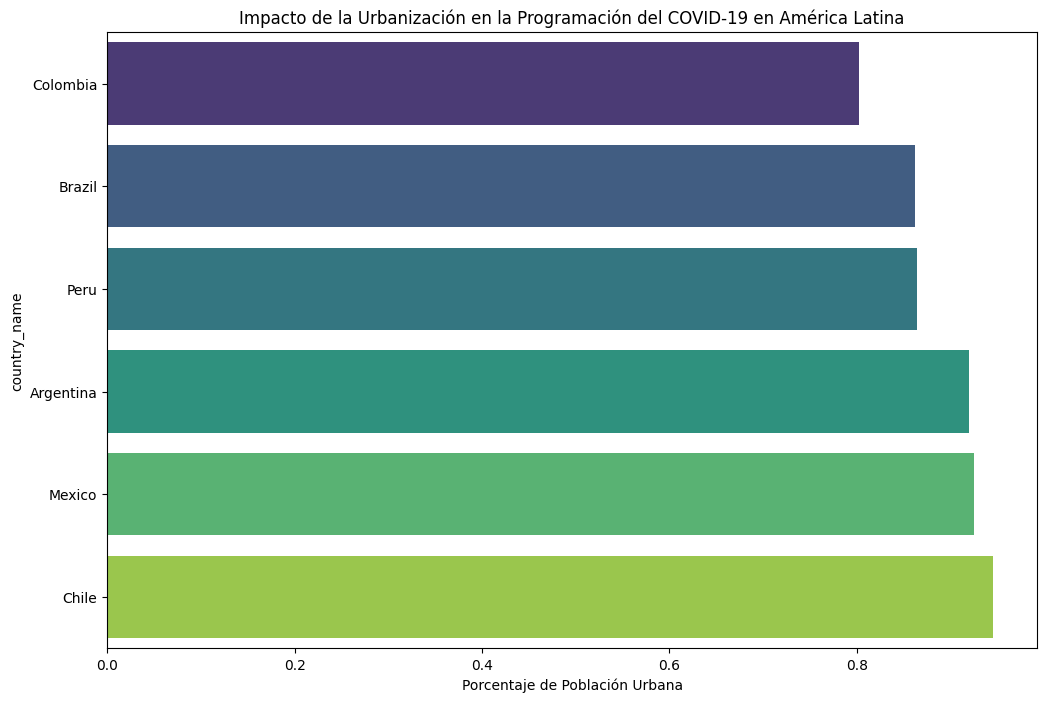

In [99]:
data_latinoamerica_paises["urban_population_percentage"]=data_latinoamerica_paises["population_urban"]/data_latinoamerica_paises["population"]
urban_cases = data_latinoamerica_paises.groupby("country_name").last().sort_values(by="urban_population_percentage")

plt.figure(figsize=(12,8))
sns.barplot(x=urban_cases["urban_population_percentage"],y=urban_cases.index,palette="viridis")
plt.xlabel("Porcentaje de Población Urbana")
plt.title("Impacto de la Urbanización en la Programación del COVID-19 en América Latina")
plt.show()

Se evidencia que Chile fue el país con más propagación.

Por densidad poblacional por grupos etareos:

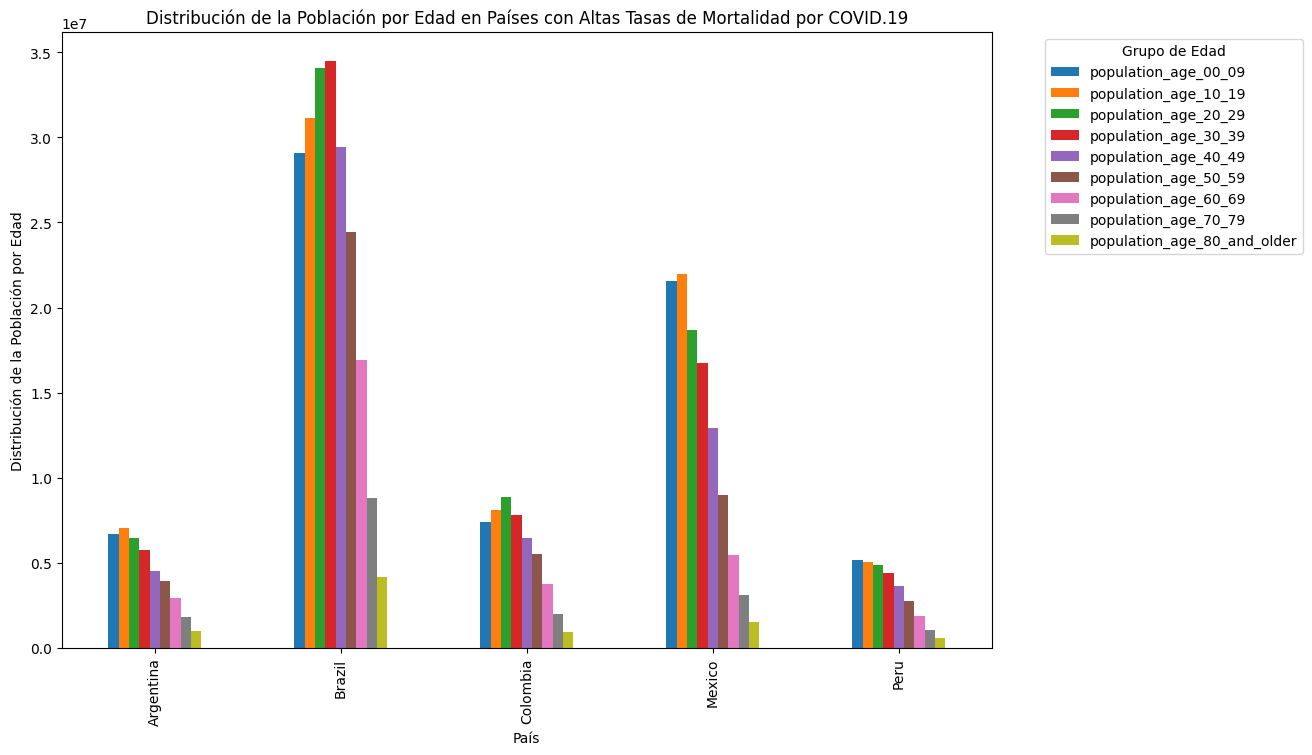

In [100]:
high_mortality_countries = data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().sort_values(ascending=False).head(5).index
age_groups = ["population_age_00_09","population_age_10_19","population_age_20_29","population_age_30_39","population_age_40_49","population_age_50_59","population_age_60_69","population_age_70_79","population_age_80_and_older"]
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises["country_name"].isin(high_mortality_countries)].groupby("country_name")[age_groups].mean()

age_distribution.plot(kind="bar",stacked=False,figsize=(12,8))
plt.xlabel("País")
plt.ylabel("Distribución de la Población por Edad")
plt.title("Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID.19")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",title="Grupo de Edad")
plt.show()

Con este gráfico se pudo obtener una vista clara de la desigualda en cantidades de población por grupor etareaos, muy útil tal vez para futuros análisis.

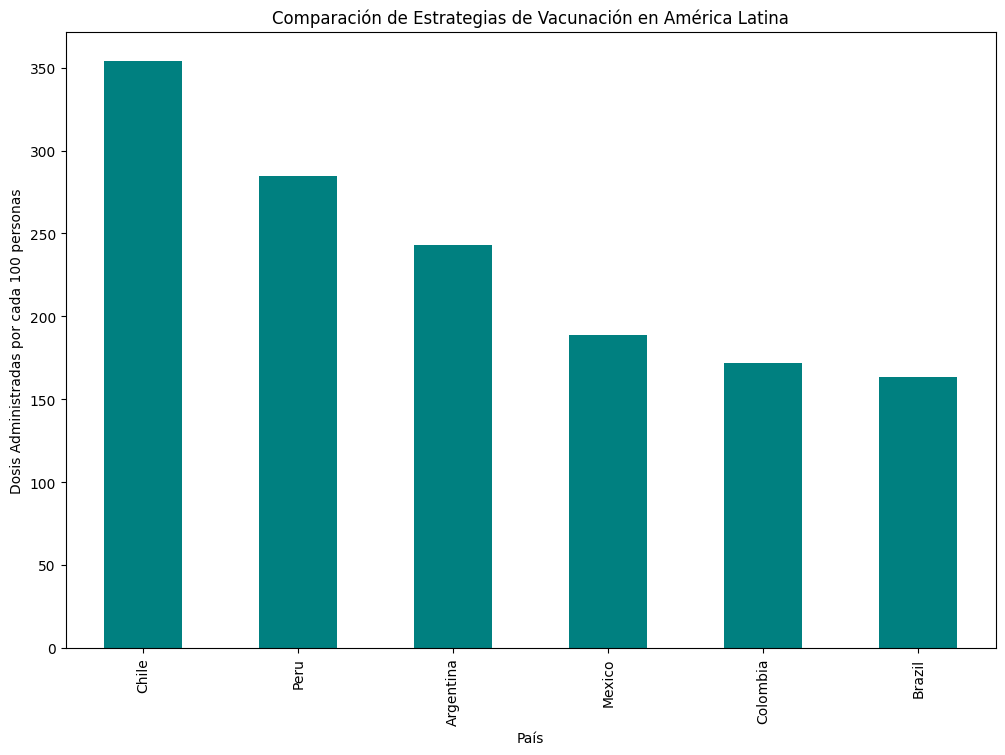

In [101]:
vaccination_strategy= data_latinoamerica_paises.groupby("country_name")["cumulative_vaccine_doses_administered"].max() / data_latinoamerica_paises.groupby("country_name")["population"].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind="bar",figsize=(12,8),color="teal")
plt.xlabel("País")
plt.ylabel("Dosis Administradas por cada 100 personas")
plt.title("Comparación de Estrategias de Vacunación en América Latina")
plt.show()

Con esto definimos los países que más ayuda requieren y donde es recomendable interferir con nuevos centros. En este gráfico se ve que Brasil y Colombia son los principales candidatos.

Diabetes en porcentajes:

In [102]:
high_mortality_countries = data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().sort_values(ascending=False).head(5).index

In [103]:
data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index

Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [104]:
data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

Text(0.5, 1.0, 'Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por COVID-19')

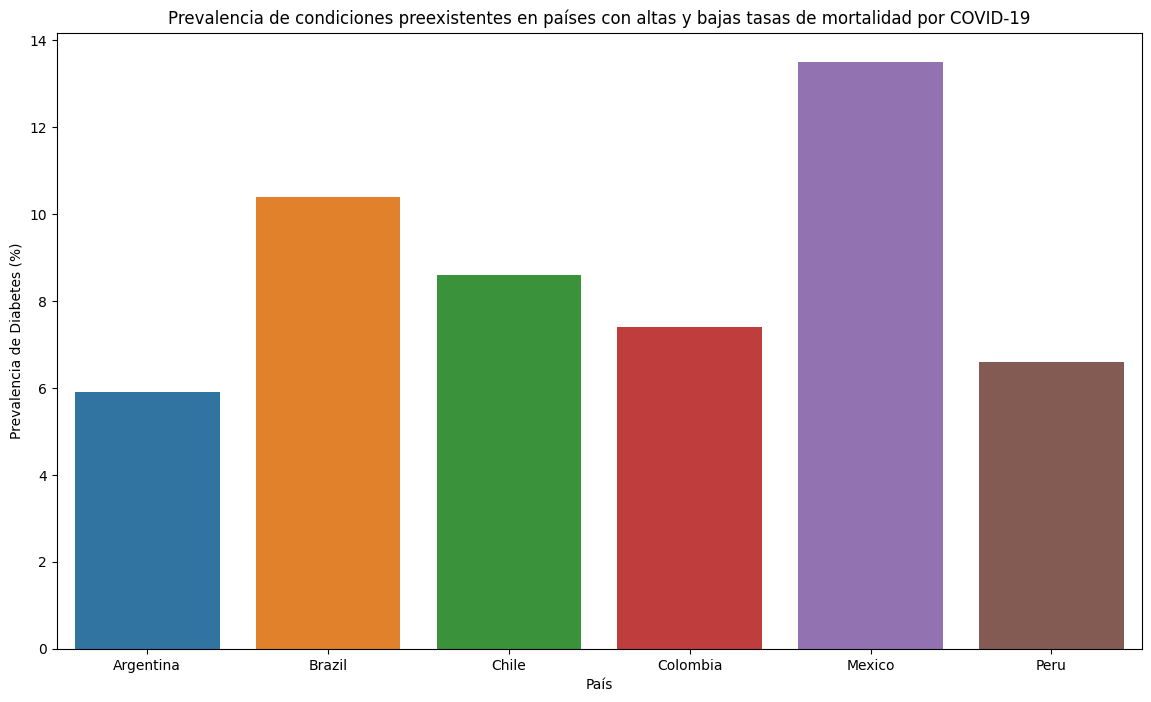

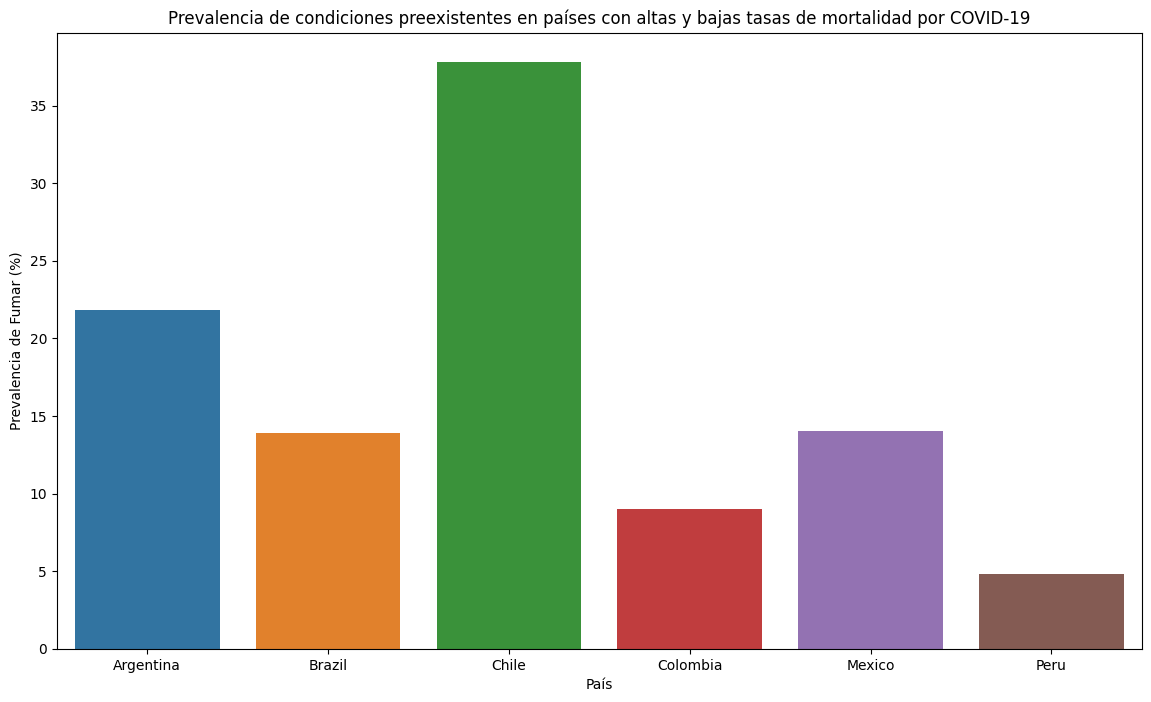

In [105]:
#Prevalencia de diabetes
top_countries=data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index
bottom_countries=data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nsmallest(5).index
condition_data = data_latinoamerica_paises[data_latinoamerica_paises["country_name"].isin(top_countries.union(bottom_countries))]

plt.figure(figsize=(14,8))
sns.barplot(data=condition_data,x="country_name",y="diabetes_prevalence",hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalencia de Diabetes (%)")
plt.title("Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por COVID-19")

#Prevalencia de fumar
plt.figure(figsize=(14,8))
sns.barplot(data=condition_data,x="country_name",y="smoking_prevalence",hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalencia de Fumar (%)")
plt.title("Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por COVID-19")

Con estos nuevos gráficos notamos que la diabetes afecta más a México y Brasil. Y fumar afecta más a Chile y Argentina.

Fatalidad por país:

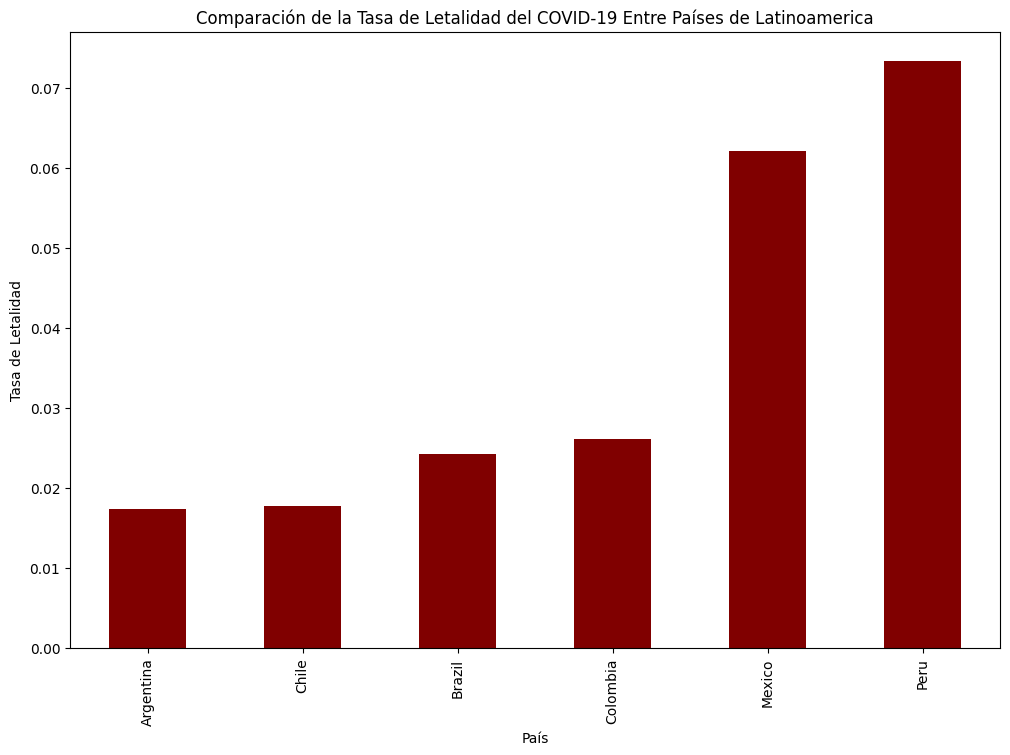

In [106]:
import matplotlib.pyplot as plt

#Calculo de la tasa de letalidad por país
data_latinoamerica_paises["case_fatality_rate"]=data_latinoamerica_paises["cumulative_deceased"]/data_latinoamerica_paises["cumulative_confirmed"]
fatality_rates = data_latinoamerica_paises.groupby("country_name")["case_fatality_rate"].last().sort_values()

#Grafico de barras
plt.figure(figsize=(12,8))
fatality_rates.plot(kind="bar",color="maroon")
plt.xlabel("País")
plt.ylabel("Tasa de Letalidad")
plt.title("Comparación de la Tasa de Letalidad del COVID-19 Entre Países de Latinoamerica")
plt.show()

Hay un comportamiento similar de la fatalidad, con una leve disminución reciente.

Gracias a las dosis de las vacunas se aprecia una disminución y en nuevos casos y muertes. 

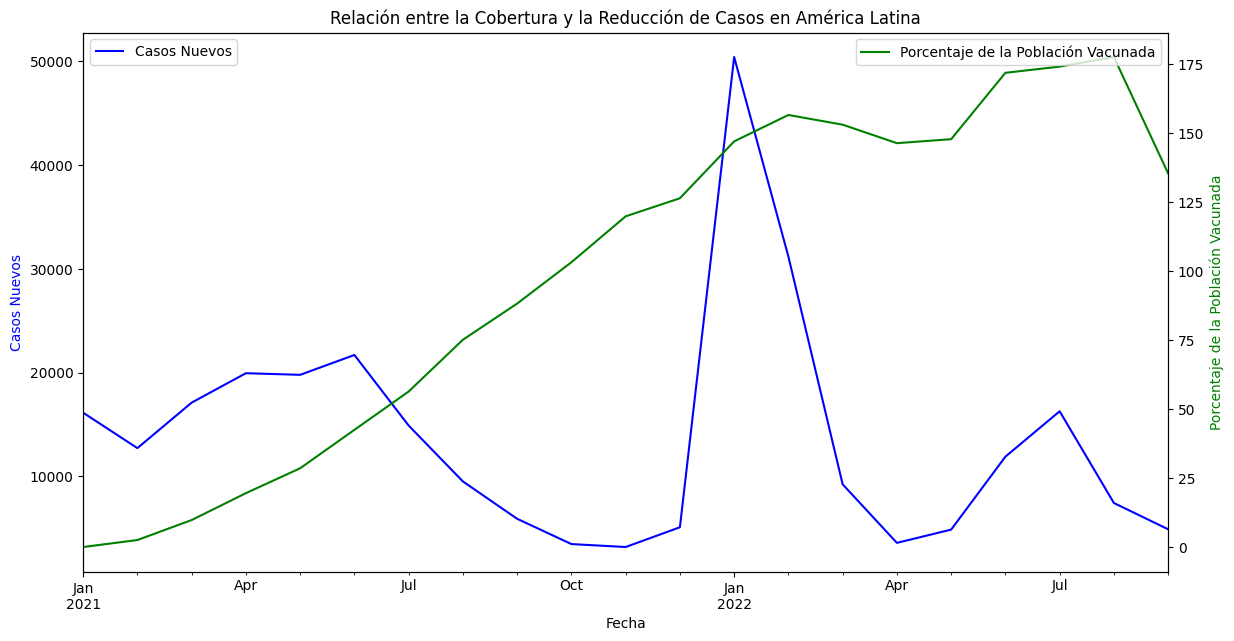

In [107]:
#Evolución de la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14,7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#Percentajes de vacunación
data_latinoamerica_paises["percentage_vaccinated"]=(data_latinoamerica_paises["cumulative_vaccine_doses_administered"]/data_latinoamerica_paises["population"])*100
data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["new_confirmed"].plot(ax=ax1,color="blue",label="Casos Nuevos")
data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["percentage_vaccinated"].plot(ax=ax2,color="green",label="Porcentaje de la Población Vacunada")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Nuevos",color="blue")
ax2.set_ylabel("Porcentaje de la Población Vacunada",color="green")
ax1.set_title("Relación entre la Cobertura y la Reducción de Casos en América Latina")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

C:\Users\ignac\AppData\Local\Temp\ipykernel_30576\2784891977.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latinoamerica_paises,x="date",y="mortality_rate",estimator="mean",ci=None)


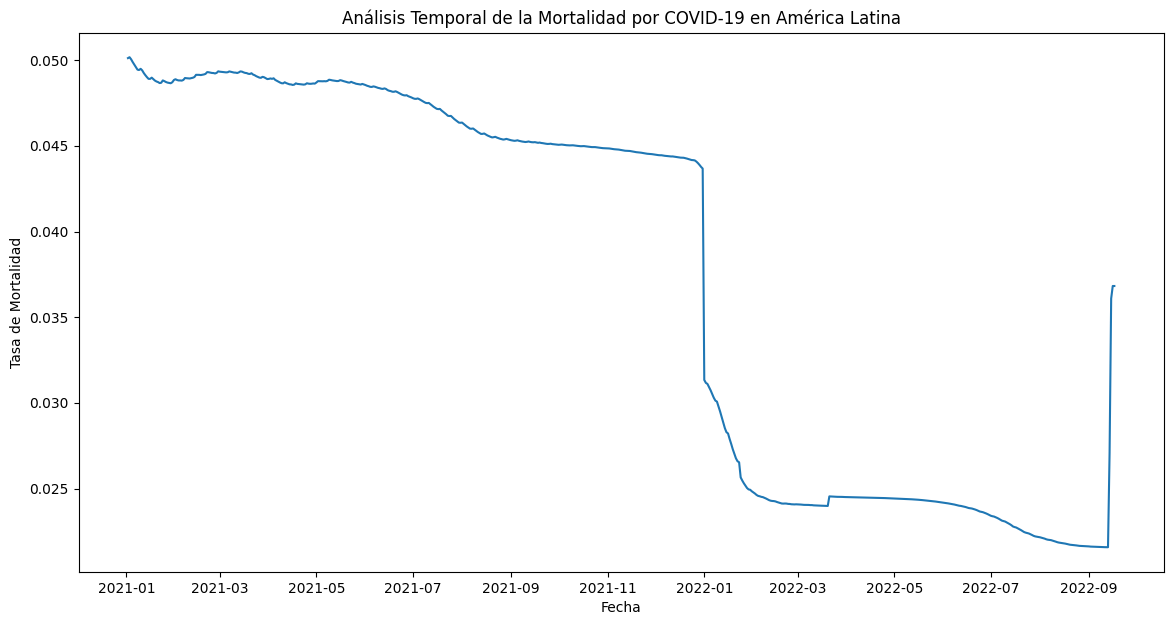

In [108]:
#Evolución de la mortalidad

data_latinoamerica_paises["mortality_rate"]=data_latinoamerica_paises["cumulative_deceased"]/data_latinoamerica_paises["cumulative_confirmed"]

plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises,x="date",y="mortality_rate",estimator="mean",ci=None)
plt.title("Análisis Temporal de la Mortalidad por COVID-19 en América Latina")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Mortalidad")
plt.show()

Gracias a la vacunación se puede ver que los casos activos disminuyen y los casos recuperados van en aumento.

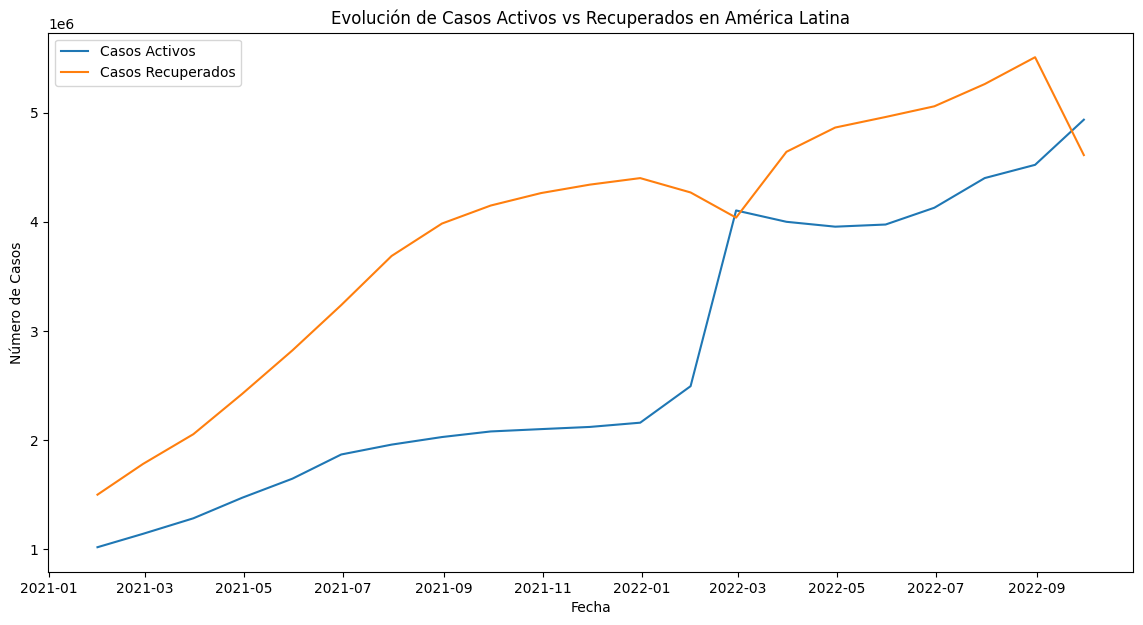

In [109]:
#Evolución de los casos activos y recuperados en Latinoamerica
data_latinoamerica_paises["active_cases"]=data_latinoamerica_paises["cumulative_confirmed"] - data_latinoamerica_paises["cumulative_deceased"] - data_latinoamerica_paises["cumulative_recovered"]
plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises.resample("ME").mean(numeric_only=True),x="date",y="active_cases",label="Casos Activos")
sns.lineplot(data=data_latinoamerica_paises.resample("ME").mean(numeric_only=True),x="date",y="cumulative_recovered",label="Casos Recuperados")
plt.title("Evolución de Casos Activos vs Recuperados en América Latina")
plt.xlabel("Fecha")
plt.ylabel("Número de Casos")
plt.legend()
plt.show()


Estado actual de los países seleccionados para la idea de explansión (teniendo en cuenta la limpieza de nulos y anomalias de nuestros datos)

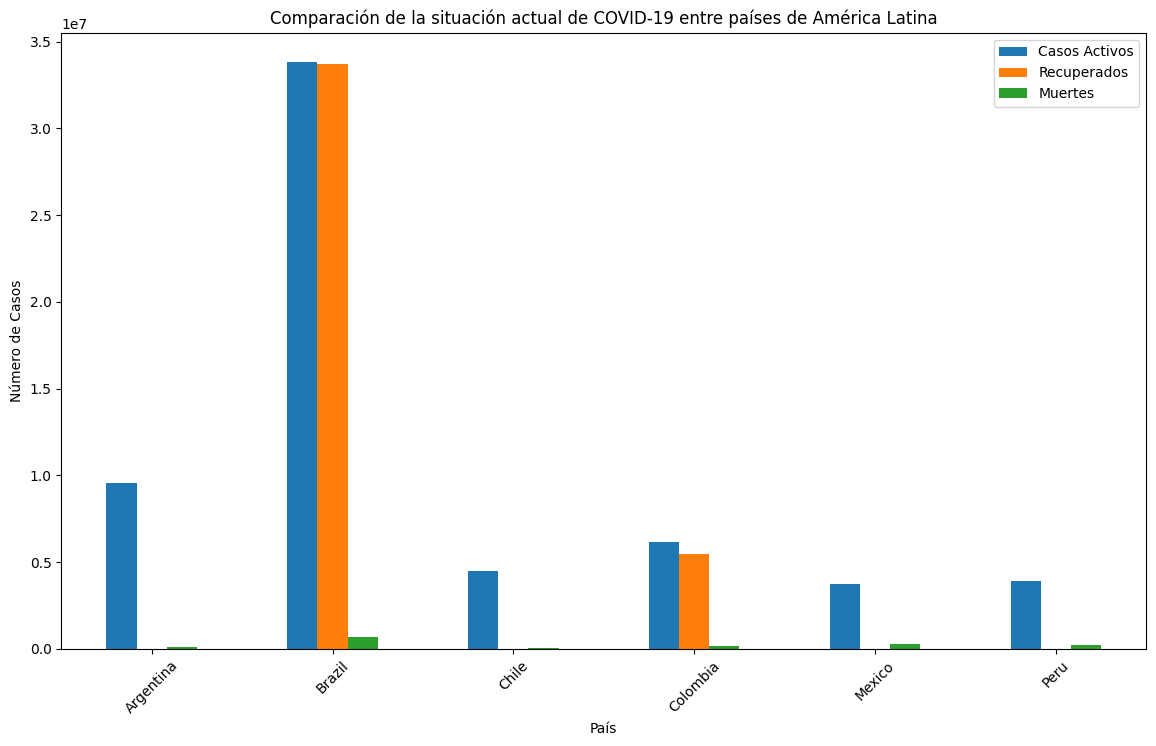

In [110]:
current_situation = data_latinoamerica_paises.groupby("country_name").max()[["active_cases","cumulative_recovered","cumulative_deceased"]]
current_situation.plot(kind="bar",stacked=False,figsize=(14,8))
plt.title("Comparación de la situación actual de COVID-19 entre países de América Latina")
plt.xlabel("País")
plt.ylabel("Número de Casos")
plt.legend(["Casos Activos","Recuperados","Muertes"])
plt.xticks(rotation=45)
plt.show()

Conclusión: Los países donde es más recomendable expandir la empresa es en Brasil.
Es el país con más confirmados y muertes, además de ser el que menos vacunas ha administrado.
Todo teniendo en cuenta los datos manejados en este dataset y sin tener en cuenta factores como la politica o la economía.

## EXTRA CREDIT

Mapa de la distribución de casos confirmados en latinoamerica por país

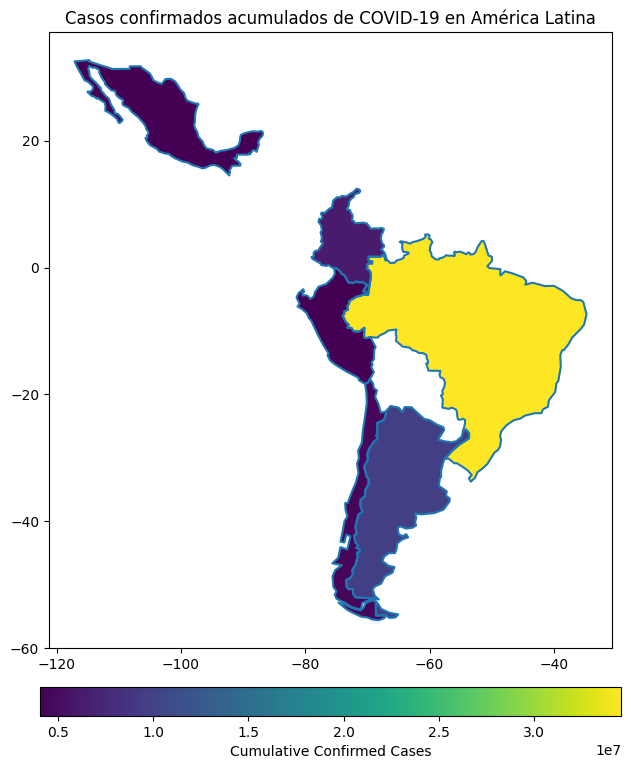

In [111]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el GeoJSON directamente desde una URL
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(url)

# Filtros y operaciones sobre el DataFrame
world = world[(world["name"] == "Argentina") | (world["name"] == "Chile") | 
              (world["name"] == "Colombia") | (world["name"] == "Mexico") | 
              (world["name"] == "Brazil") | (world["name"] == "Peru")]
world = world.rename(columns={"name": "country_name"})
world = world.merge(data_latinoamerica_paises.groupby("country_name")["cumulative_confirmed"].max().reset_index(), on="country_name")

# Crear y mostrar el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column="cumulative_confirmed", ax=ax, legend=True, legend_kwds={"label": "Cumulative Confirmed Cases", "orientation": "horizontal", "shrink": 0.5, "pad": 0.05, "aspect": 20})
plt.title("Casos confirmados acumulados de COVID-19 en América Latina")
plt.show()
